In [41]:

#----Figure_1-------------------------------------------------------------------
#-------------------------------------------------------------------------------
# This is the code for aPhN/PhN clustering analysis, adapted from McKim et al. 2024
#-------------------------------------------------------------------------------

#-load packages-----------------------------------------------------------------
library(tidyverse)
library(coconatfly)

###general variables:-----------------------------------------------------------
set.seed(42)
options(scipen=999)

PATH_input = "/Users/yaolab/Library/CloudStorage/OneDrive-UniversityofFlorida/YaoLabUF/dros-gut-brain-axis/cluster_analyses/cosine_connectivity/aPhN_PhN_test/"
PATH_output = "/Users/yaolab/Library/CloudStorage/OneDrive-UniversityofFlorida/YaoLabUF/dros-gut-brain-axis/cluster_analyses/cosine_connectivity/aPhN_PhN_test/"
version <- "1.0"  # Specify version manually


In [42]:

input_files = list.files(path=PATH_input, full.names = FALSE, recursive = FALSE)

input_files_tmp = list.files(path=paste0(PATH_input, "tmp/"),
                             full.names = FALSE, recursive = FALSE)
input_files = c(input_files, input_files_tmp)
v = read_delim(paste0(PATH_input, "aPhN_PhN_v1.0_reordered.csv"),
               col_types=cols(version=col_character()), delim=";")

v = v$version[1]

# set variables:----------------------------------------------------------------
aPhN_PhN = read_delim(paste0(PATH_input, "aPhN_PhN_v1.0_reordered", v, ".csv"),
                  col_types=cols(root_id=col_character()), delim=",")
#-------------------------------------------------------------------------------
#clustering of all endocrine cells
colnames(aPhN_PhN)[1] <- 'id'
# paste0(aPhN_PhNid, collapse = ",")

#obtain meta data for all a/pharyngeal cells


Warning message:
“The following named parsers don't match the column names: version”
Warning message:
“One or more parsing issues, call `problems()` on your data frame for details,
e.g.:
  dat <- vroom(...)
  problems(dat)”
Warning message:
“Unknown or uninitialised column: `version`.”


In [43]:
ids_string <- paste(c(
"720575940627219272", "720575940625173006", "720575940622406694", "720575940623458633",
    "720575940612819763", "720575940635005303", "720575940633660314", "720575940634667234",
    "720575940611351193", "720575940610103906", "720575940617668662", "720575940621848781",
    "720575940624186602", "720575940640611803", "720575940630734393", "720575940618156315",
    "720575940635739504", "720575940620885342", "720575940629972215", "720575940638054197",
    "720575940620575579", "720575940616791067", "720575940615879995", "720575940630597177",
    "720575940607152476", "720575940620699162", "720575940631205580", "720575940626767152",
    "720575940606239666", "720575940645108936", "720575940634085786", "720575940619652033",
    "720575940648377209", "720575940644676900", "720575940627989609", "720575940627274578",
    "720575940612256938", "720575940621207517", "720575940630654539", "720575940633194029",
    "720575940623056422", "720575940620983637", "720575940622144648", "720575940611388595",
    "720575940633129171", "720575940650760825", "720575940646039092", "720575940633895469",
    "720575940625941022", "720575940633129683", "720575940631572141", "720575940607166731",
    "720575940637896245", "720575940631070239", "720575940653233569", "720575940639786830",
    "720575940613347474", "720575940633759840", "720575940620528990", "720575940632743649",
    "720575940638086256", "720575940630574659", "720575940622198772", "720575940633579360",
    "720575940624724458", "720575940624502269", "720575940631963821", "720575940631049064",
    "720575940606163842", "720575940614641202", "720575940623951591", "720575940638357813",
    "720575940611959011", "720575940625871181", "720575940620910716", "720575940626311049",
    "720575940624905572", "720575940645493283", "720575940626396803", "720575940624910373",
    "720575940617034713", "720575940604355872", "720575940621106465", "720575940632040749",
    "720575940630434616", "720575940625785731", "720575940629887695", "720575940622575754",
    "720575940612642730", "720575940622606106", "720575940611056482", "720575940636943849",
    "720575940636542565", "720575940618889931", "720575940611630194", "720575940640554045",
    "720575940632596449", "720575940616934289", "720575940637019994", "720575940613004402",
    "720575940605682790", "720575940627107271", "720575940631462969", "720575940605161388",
    "720575940639972816", "720575940630806267", "720575940659479937", "720575940626520402",
    "720575940628344074", "720575940611643033", "720575940616196539", "720575940634826135",
    "720575940609787256", "720575940615015976", "720575940625972261", "720575940623511795",
    "720575940655071905", "720575940629112887", "720575940616308921", "720575940631069255",
    "720575940628891774", "720575940611168921", "720575940610259406", "720575940626014218",
    "720575940621916952", "720575940624266061", "720575940622346180", "720575940626015242",
    "720575940617828766", "720575940629009468", "720575940625032548", "720575940625163790",
    "720575940628329546", "720575940635391845", "720575940632423394", "720575940621870349",
    "720575940618788944", "720575940633165980", "720575940616616861", "720575940633791935",
    "720575940638419534", "720575940623660558", "720575940630893196", "720575940611211417",
    "720575940627454569", "720575940658442625", "720575940609913042", "720575940640601563",
    "720575940637130985", "720575940619928929", "720575940610981362", "720575940614830239",
    "720575940617121819", "720575940625031610", "720575940621689880", "720575940628131778",
    "720575940623834300", "720575940626983952", "720575940626217226", "720575940629358807",
    "720575940622199593", "720575940624948867", "720575940637165028", "720575940631284511",
    "720575940628673474", "720575940616562150", "720575940638608803"
),
    collapse = " ")

In [44]:
# Now, retrieve metadata for all root IDs using the concatenated string
PanPharyngeal <- cf_meta(cf_ids(ids_string, datasets = "flywire"))

In [45]:
PanPharyngeal = left_join(PanPharyngeal,aPhN_PhN,by = "id")
PanPharyngeal$side_name_id = paste(
PanPharyngeal$side,
PanPharyngeal$name,PanPharyngeal$id,sep="")

In [46]:
library(bit64)

PanPharyngeal_partners <- PanPharyngeal %>%
cf_partners(
threshold = 5,        # Minimum synapse count
partners = "outputs"  # Focus on output synapses
)

# 4. Aggregate synapse counts per neuron
output_counts <- PanPharyngeal_partners %>%
group_by(pre_id) %>%
summarise(output_count = sum(weight))

# 5. Convert pre_id to character for compatibility
output_counts <- output_counts %>%
mutate(pre_id = as.character(pre_id))

# 6. Join counts back to metadata
PanPharyngeal <- PanPharyngeal %>%
left_join(output_counts, by = c("id" = "pre_id")) %>%
filter(output_count >= 5)

In [48]:
# Generate the plot with corrected labels (use 'id' instead of 'side_name_id')
pdf(paste0("/Users/yaolab/Library/CloudStorage/OneDrive-UniversityofFlorida/YaoLabUF/dros-gut-brain-axis/cluster_analyses/cosine_connectivity/aPhN_PhN_test/Figure_1_WD2o", v, ".pdf"),
width = 20, height = 16)
par(mar = c(10, 10, 4, 2) + 0.1)
PanPharyngeal %>%
with(cf_cosine_plot(
        key,
        threshold = 1,
        labRow = id,  # Use raw root IDs for labels
        interactive = FALSE,
        partners = "outputs",
        method = "ward.D2",
        cexRow = 0.3,
        cexCol = 0.3
))
dev.off()

Warning message in coconat::partner_summary2adjacency_matrix(x[["outputs"]], inputcol = "pre_key", :
“Dropping: 1084/14017 neurons representing 5684/101142 synapses due to missing ids!”


pdf 
  2

Warning message in coconat::partner_summary2adjacency_matrix(x[["outputs"]], inputcol = "pre_key", :
“Dropping: 1084/14017 neurons representing 5684/101142 synapses due to missing ids!”


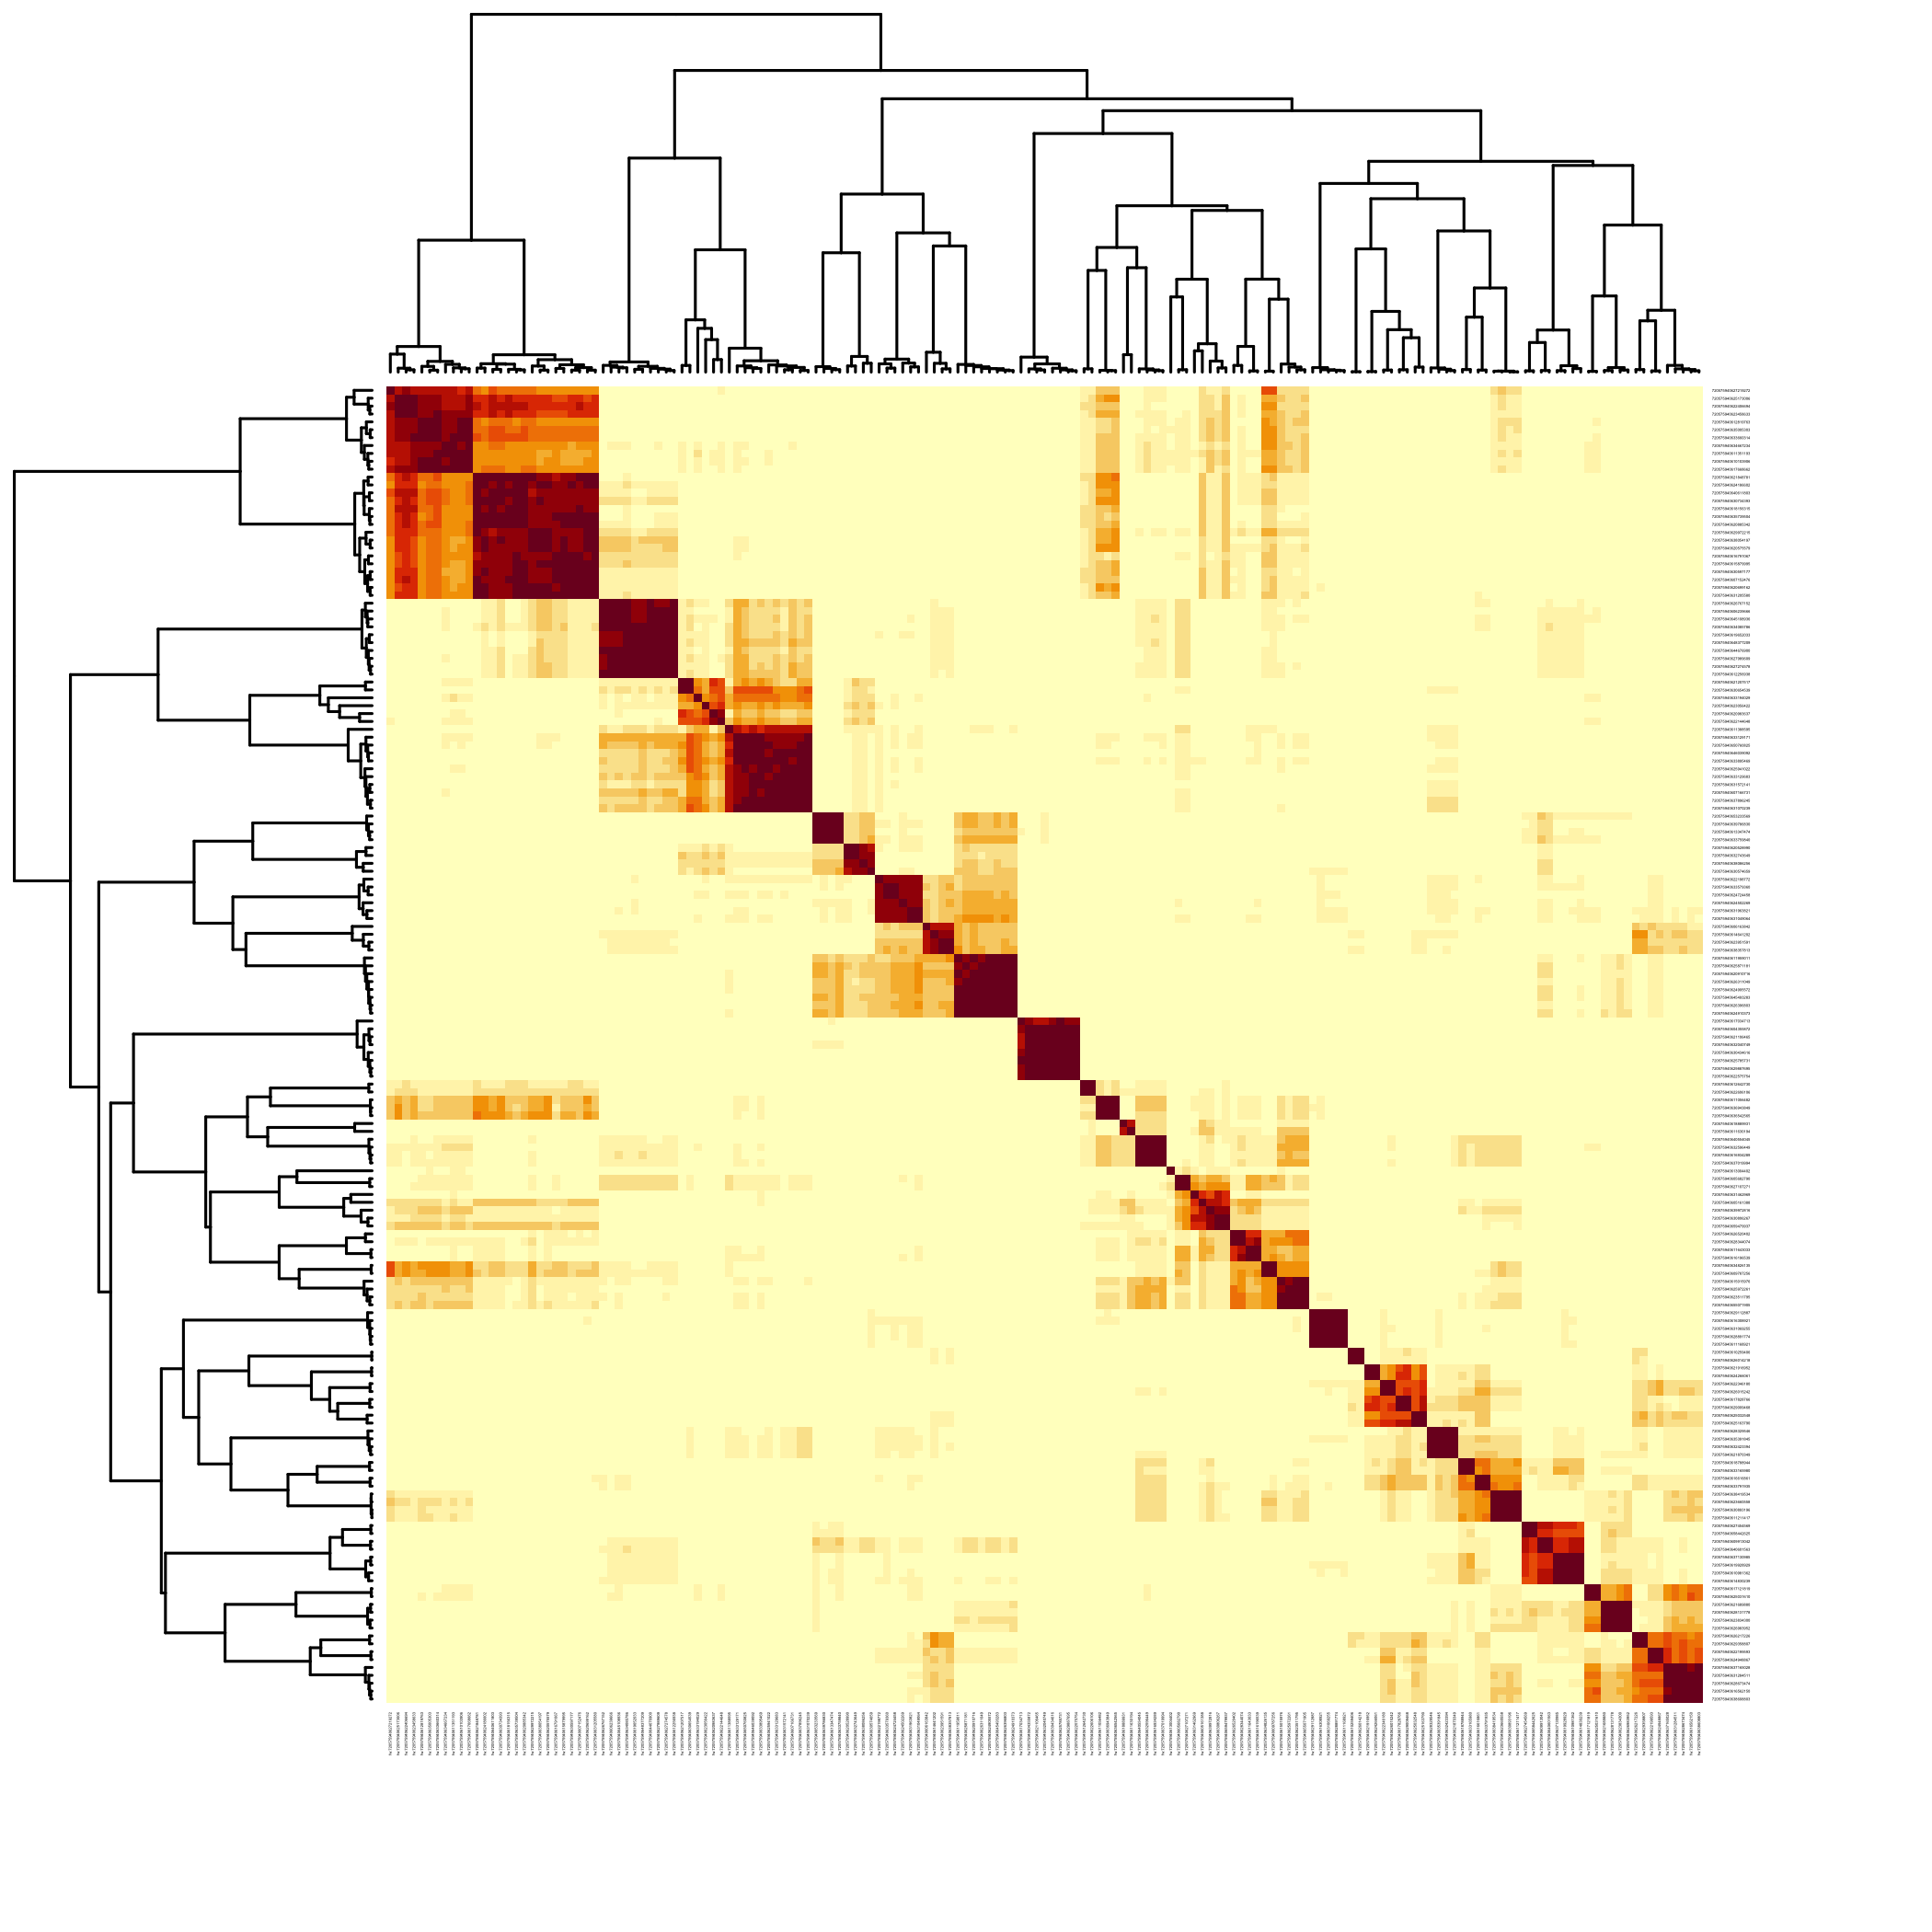

In [49]:
# Generate the plot with corrected labels (use 'id' instead of 'side_name_id')
# Set graphic parameters to bring labels closer and add ticks
par(mgp = c(3, .7, 0), tcl = -0.3)

# Set margins if needed (you already have a large left margin)
par(mar = c(15, 20, 4, 2) + 0.1, oma = c(0, 0, 0, 0))
PanPharyngeal %>%
with(cf_cosine_plot(
        key,
        threshold = 1,
        labRow = id,  # Use raw root IDs for labels
        interactive = FALSE,
        partners = "outputs",
        method = "ward.D2",
        cexRow = 0.1,
        cexCol = 0.1
))


Warning message in coconat::partner_summary2adjacency_matrix(x[["outputs"]], inputcol = "pre_key", :
“Dropping: 1084/14017 neurons representing 5684/101142 synapses due to missing ids!”


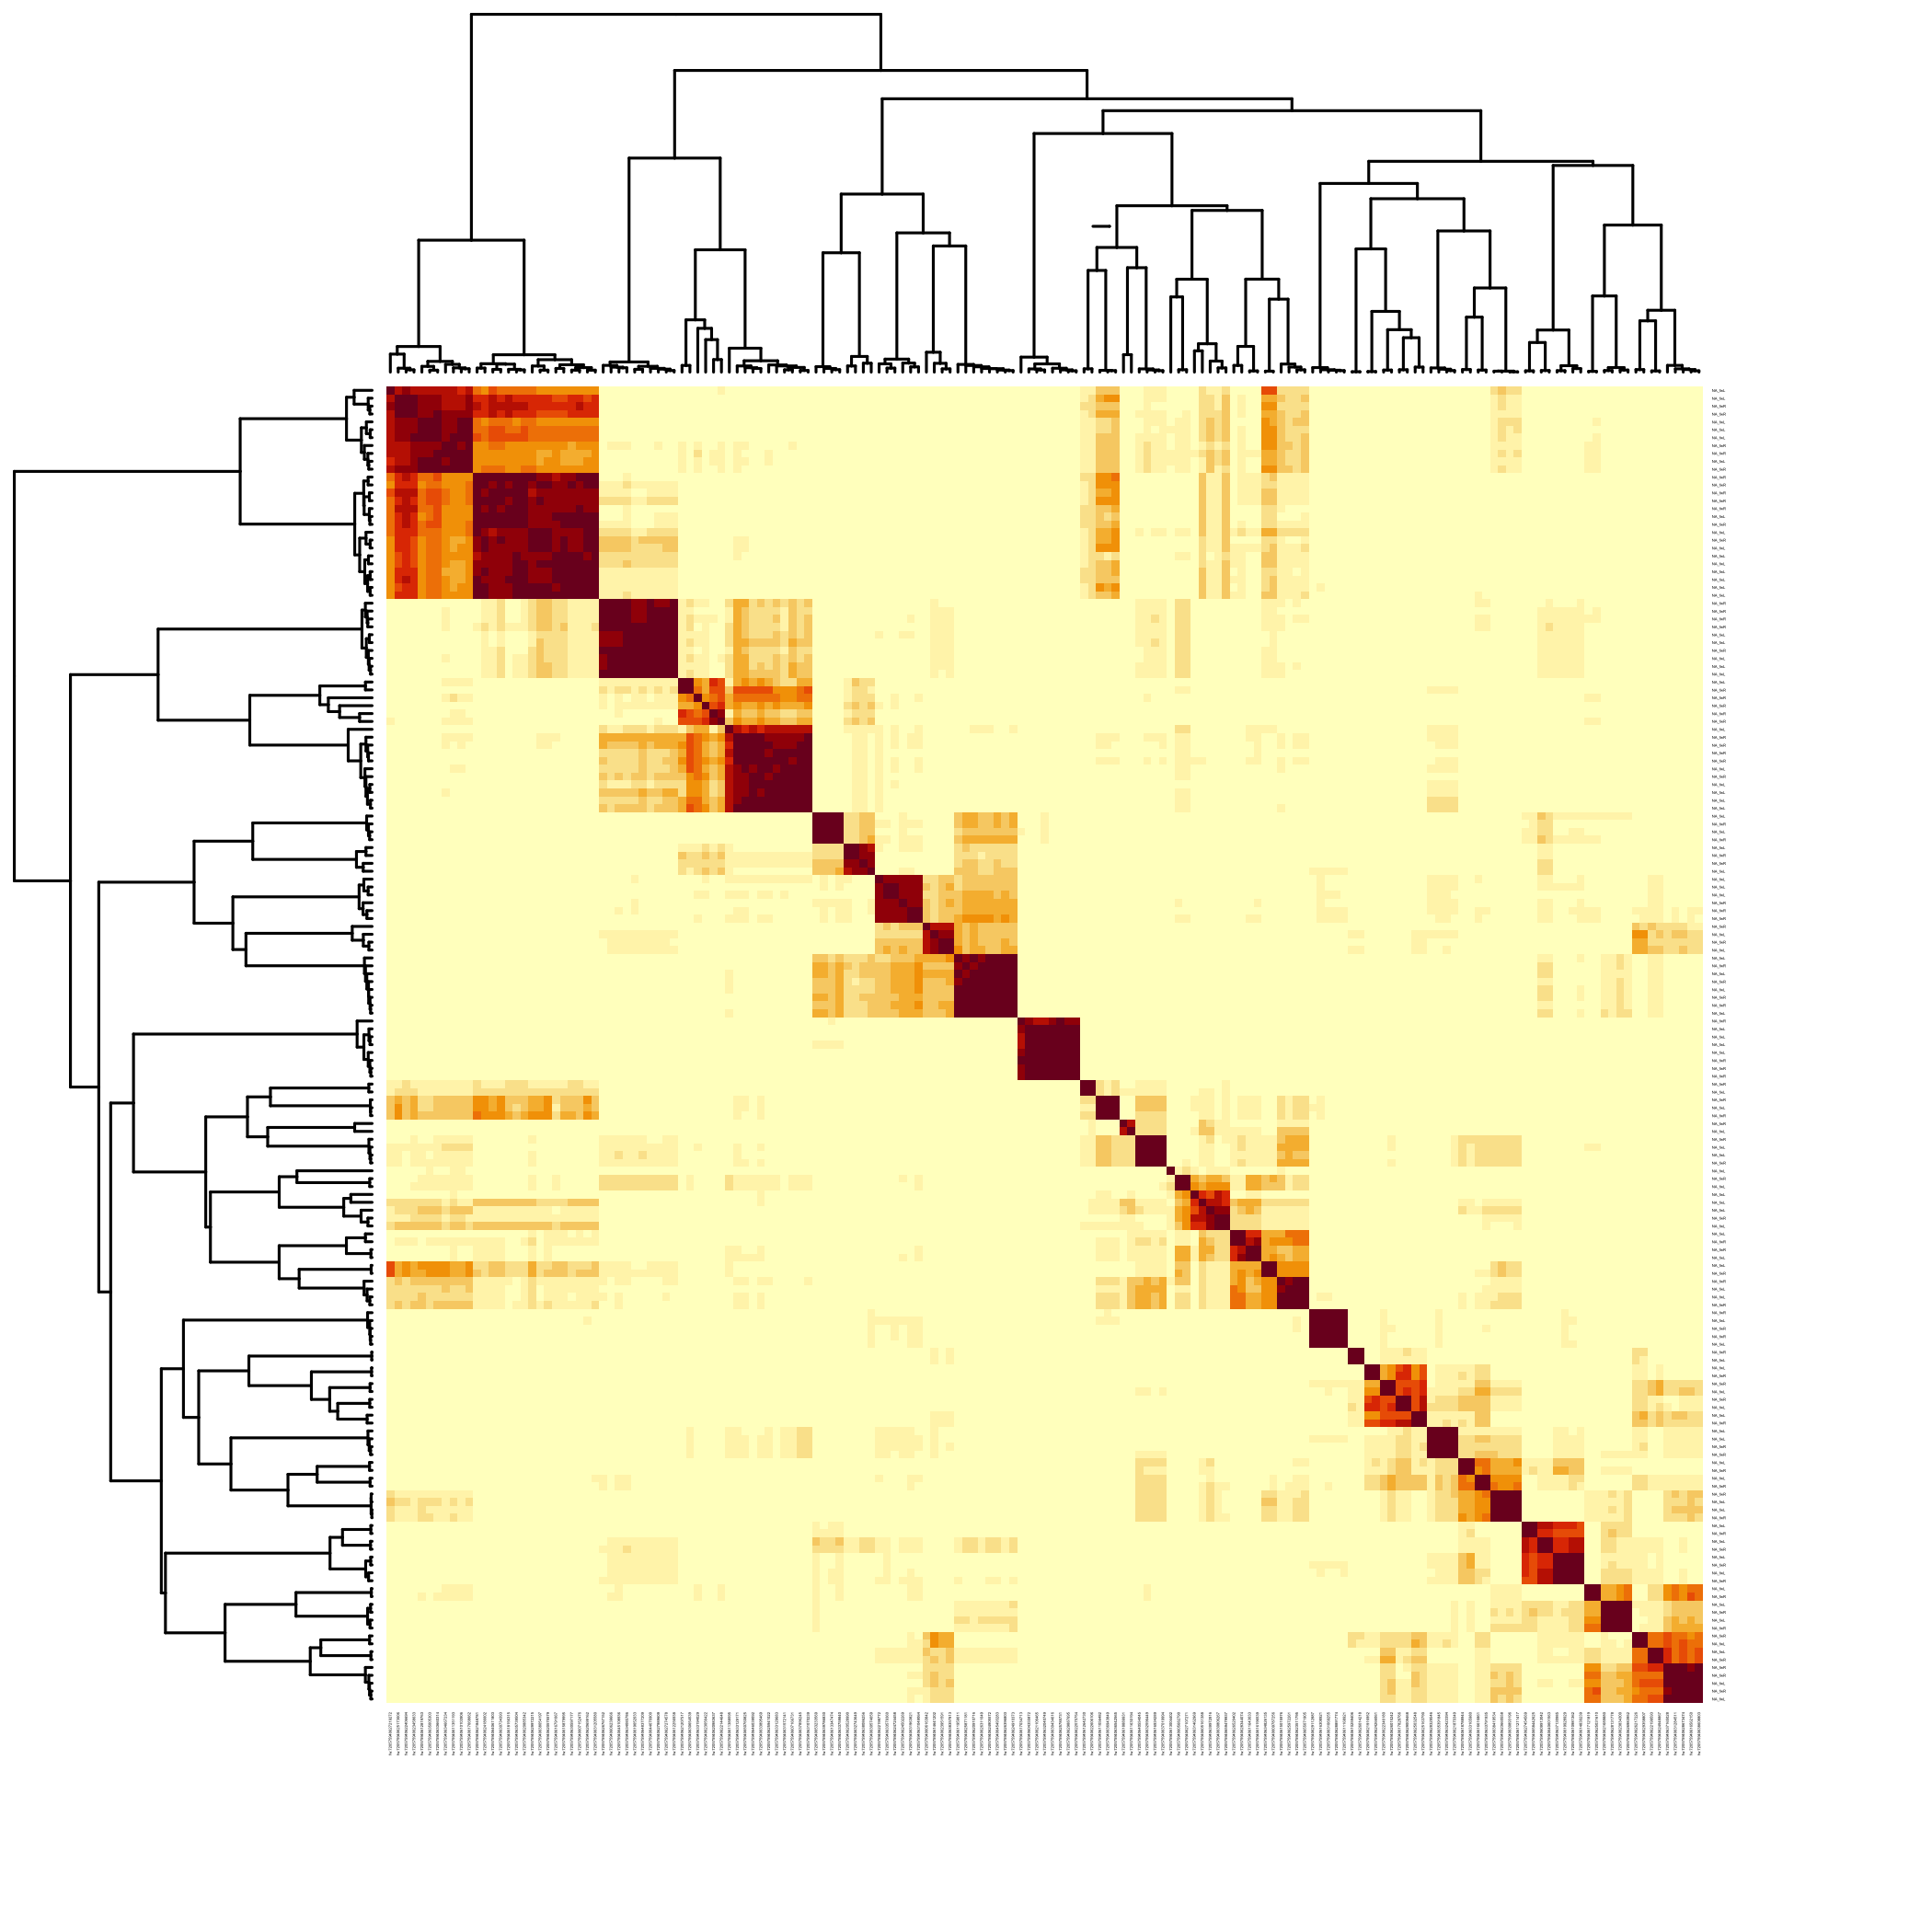

In [50]:
# Set graphic parameters to bring labels closer and add ticks
par(mgp = c(3, .7, 0), tcl = -0.3)

# Set margins if needed (you already have a large left margin)
par(mar = c(15, 20, 4, 2) + 0.1, oma = c(0, 0, 0, 0))

# Generate the heat map using the custom labels with increased text size if needed
PanPharyngeal %>%
with(cf_cosine_plot(
        key,
        threshold = 1,      # Custom labels with nerve: id
        interactive = FALSE,
        partners = "outputs",
        method = "ward.D2",
        cexRow = 0.1,              # Increase row label font size for clarity
        cexCol = 0.1               # Increase column label font size if needed
))

# If the function doesn't draw ticks, add them manually:
N <- nrow(PanPharyngeal)
axis(side = 2, at = 1:N, labels = rep("", N), tick = TRUE, las = 1)

Warning message in coconat::partner_summary2adjacency_matrix(x[["outputs"]], inputcol = "pre_key", :
“Dropping: 1084/14017 neurons representing 5684/101142 synapses due to missing ids!”


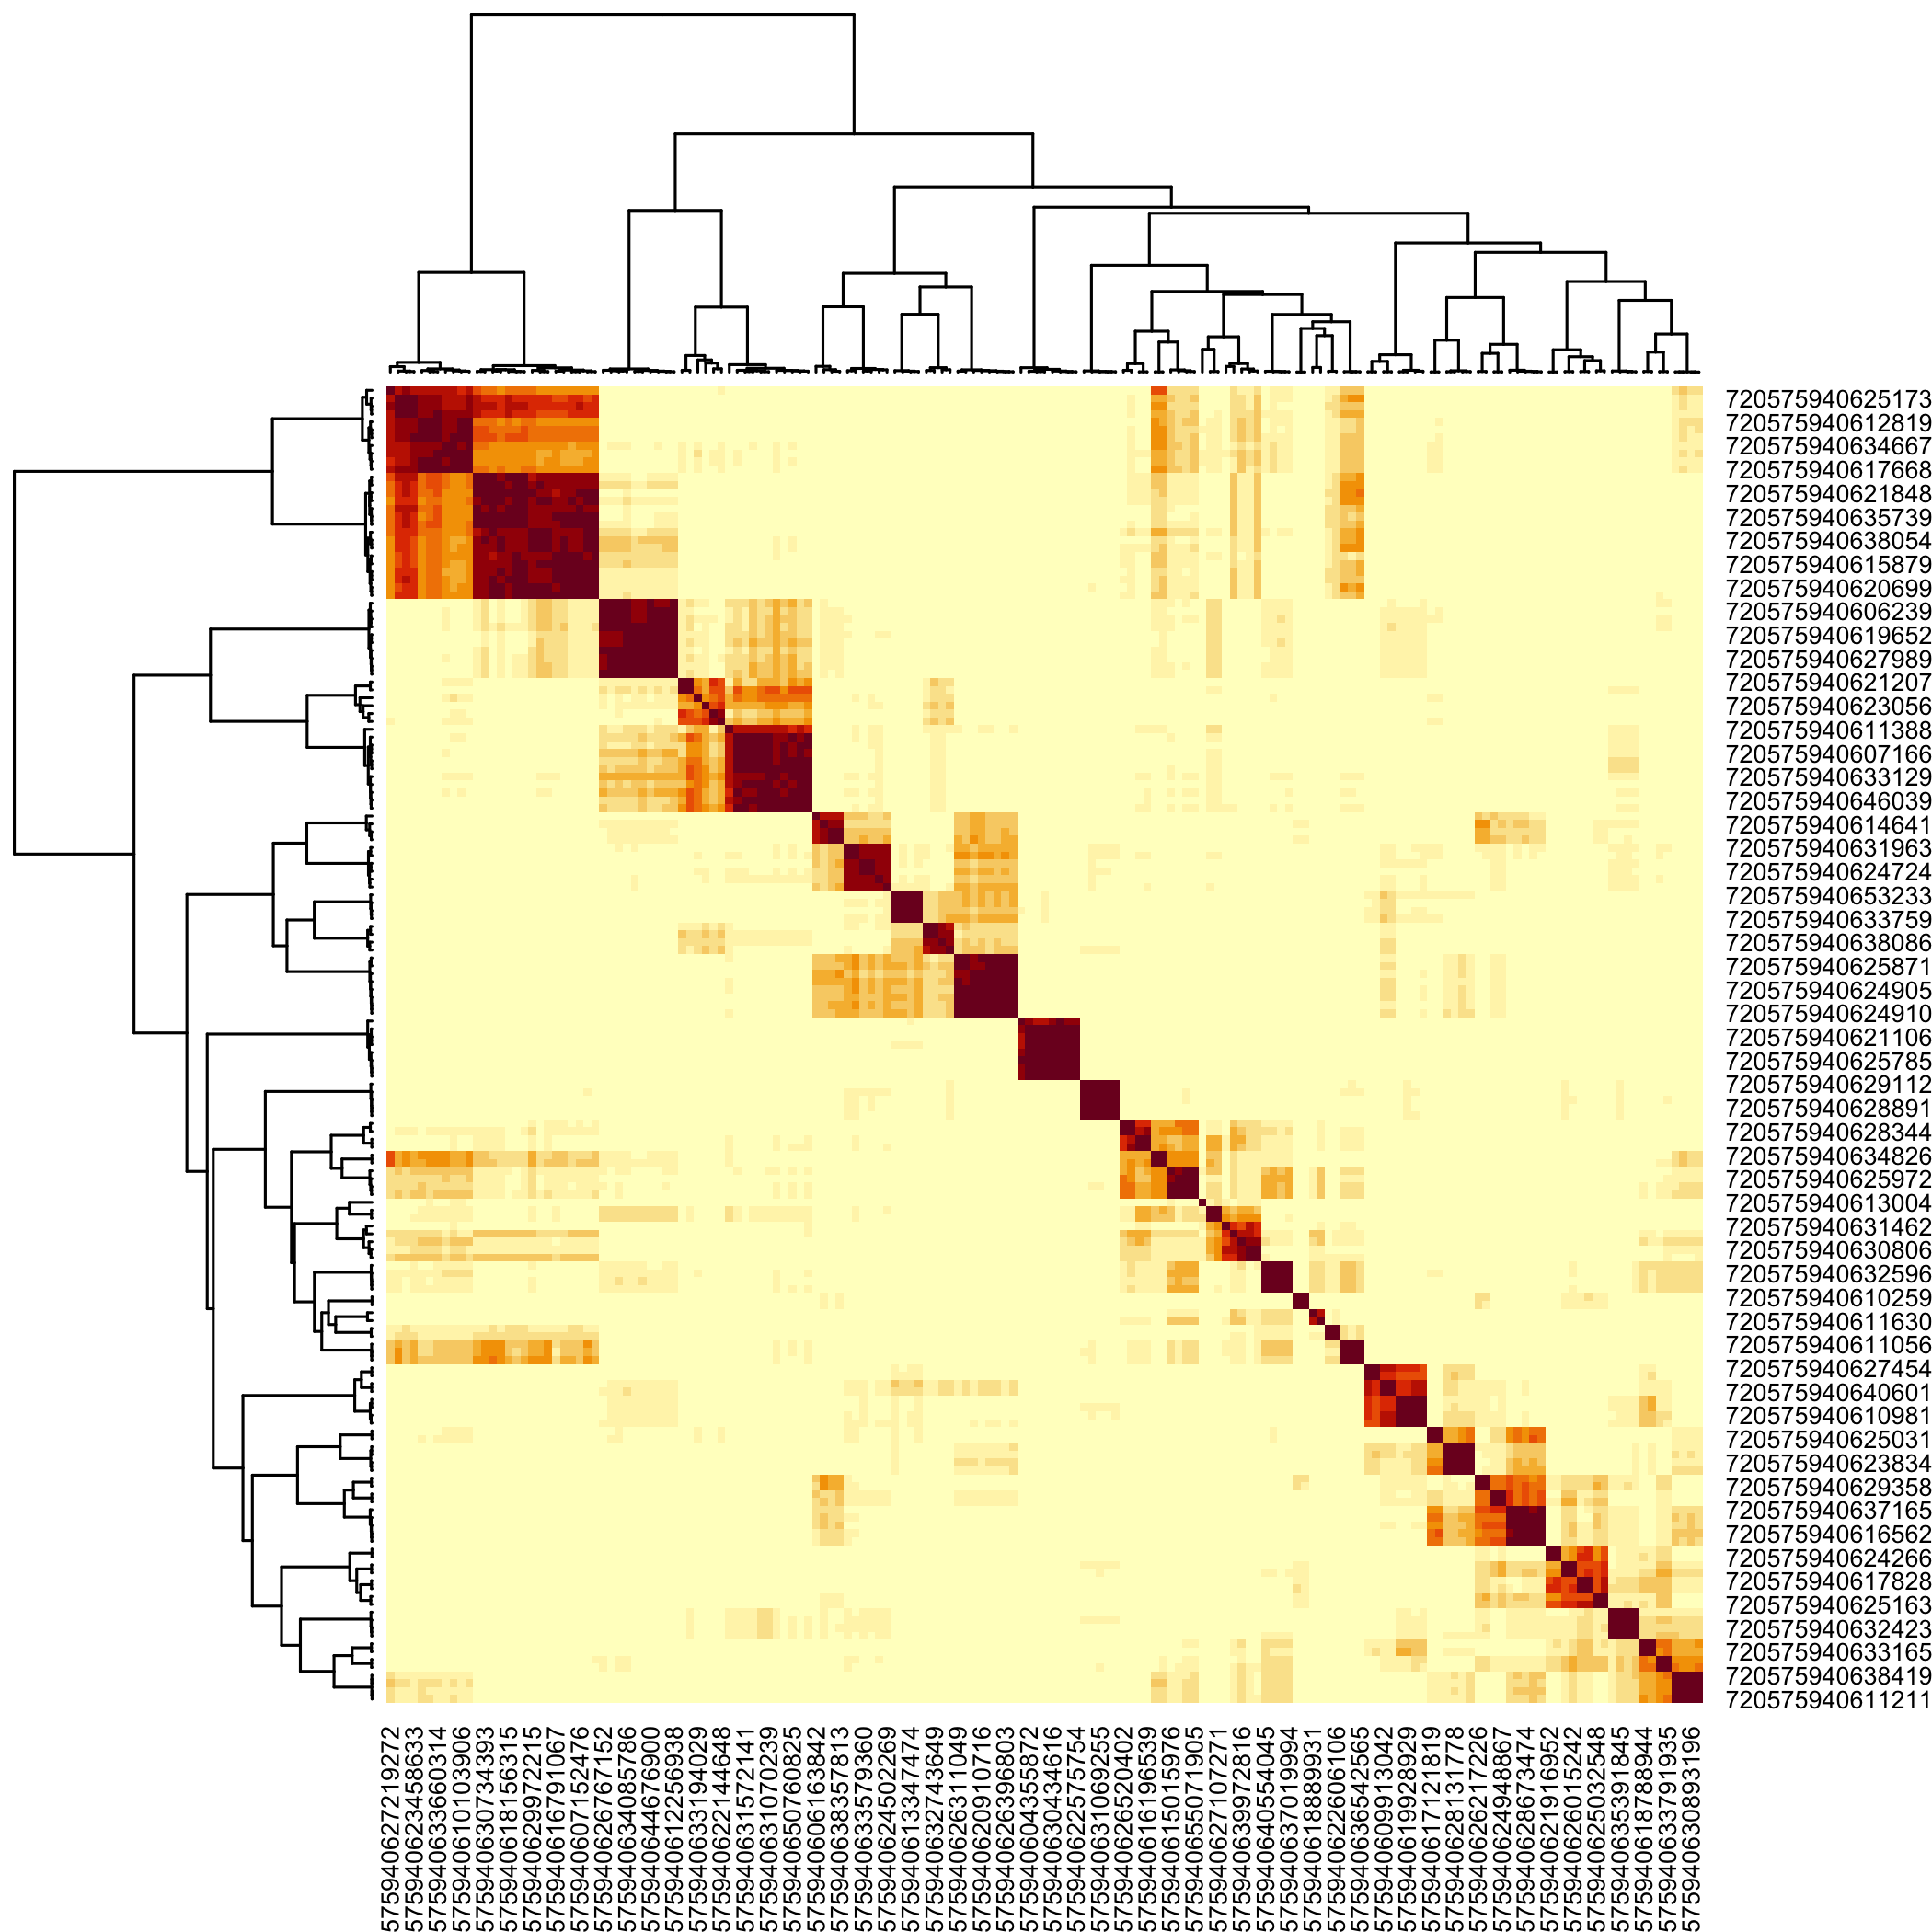

In [51]:
# Generate the plot with corrected labels (use 'id' instead of 'side_name_id')

PanPharyngeal %>%
with(cf_cosine_plot(
        key,
        threshold = 1,
        labRow = id,  # Use raw root IDs for labels
        interactive = FALSE,
        partners = "outputs",
        method = "ward.D"
))


Warning message in coconat::partner_summary2adjacency_matrix(x[["outputs"]], inputcol = "pre_key", :
“Dropping: 1084/14017 neurons representing 5684/101142 synapses due to missing ids!”


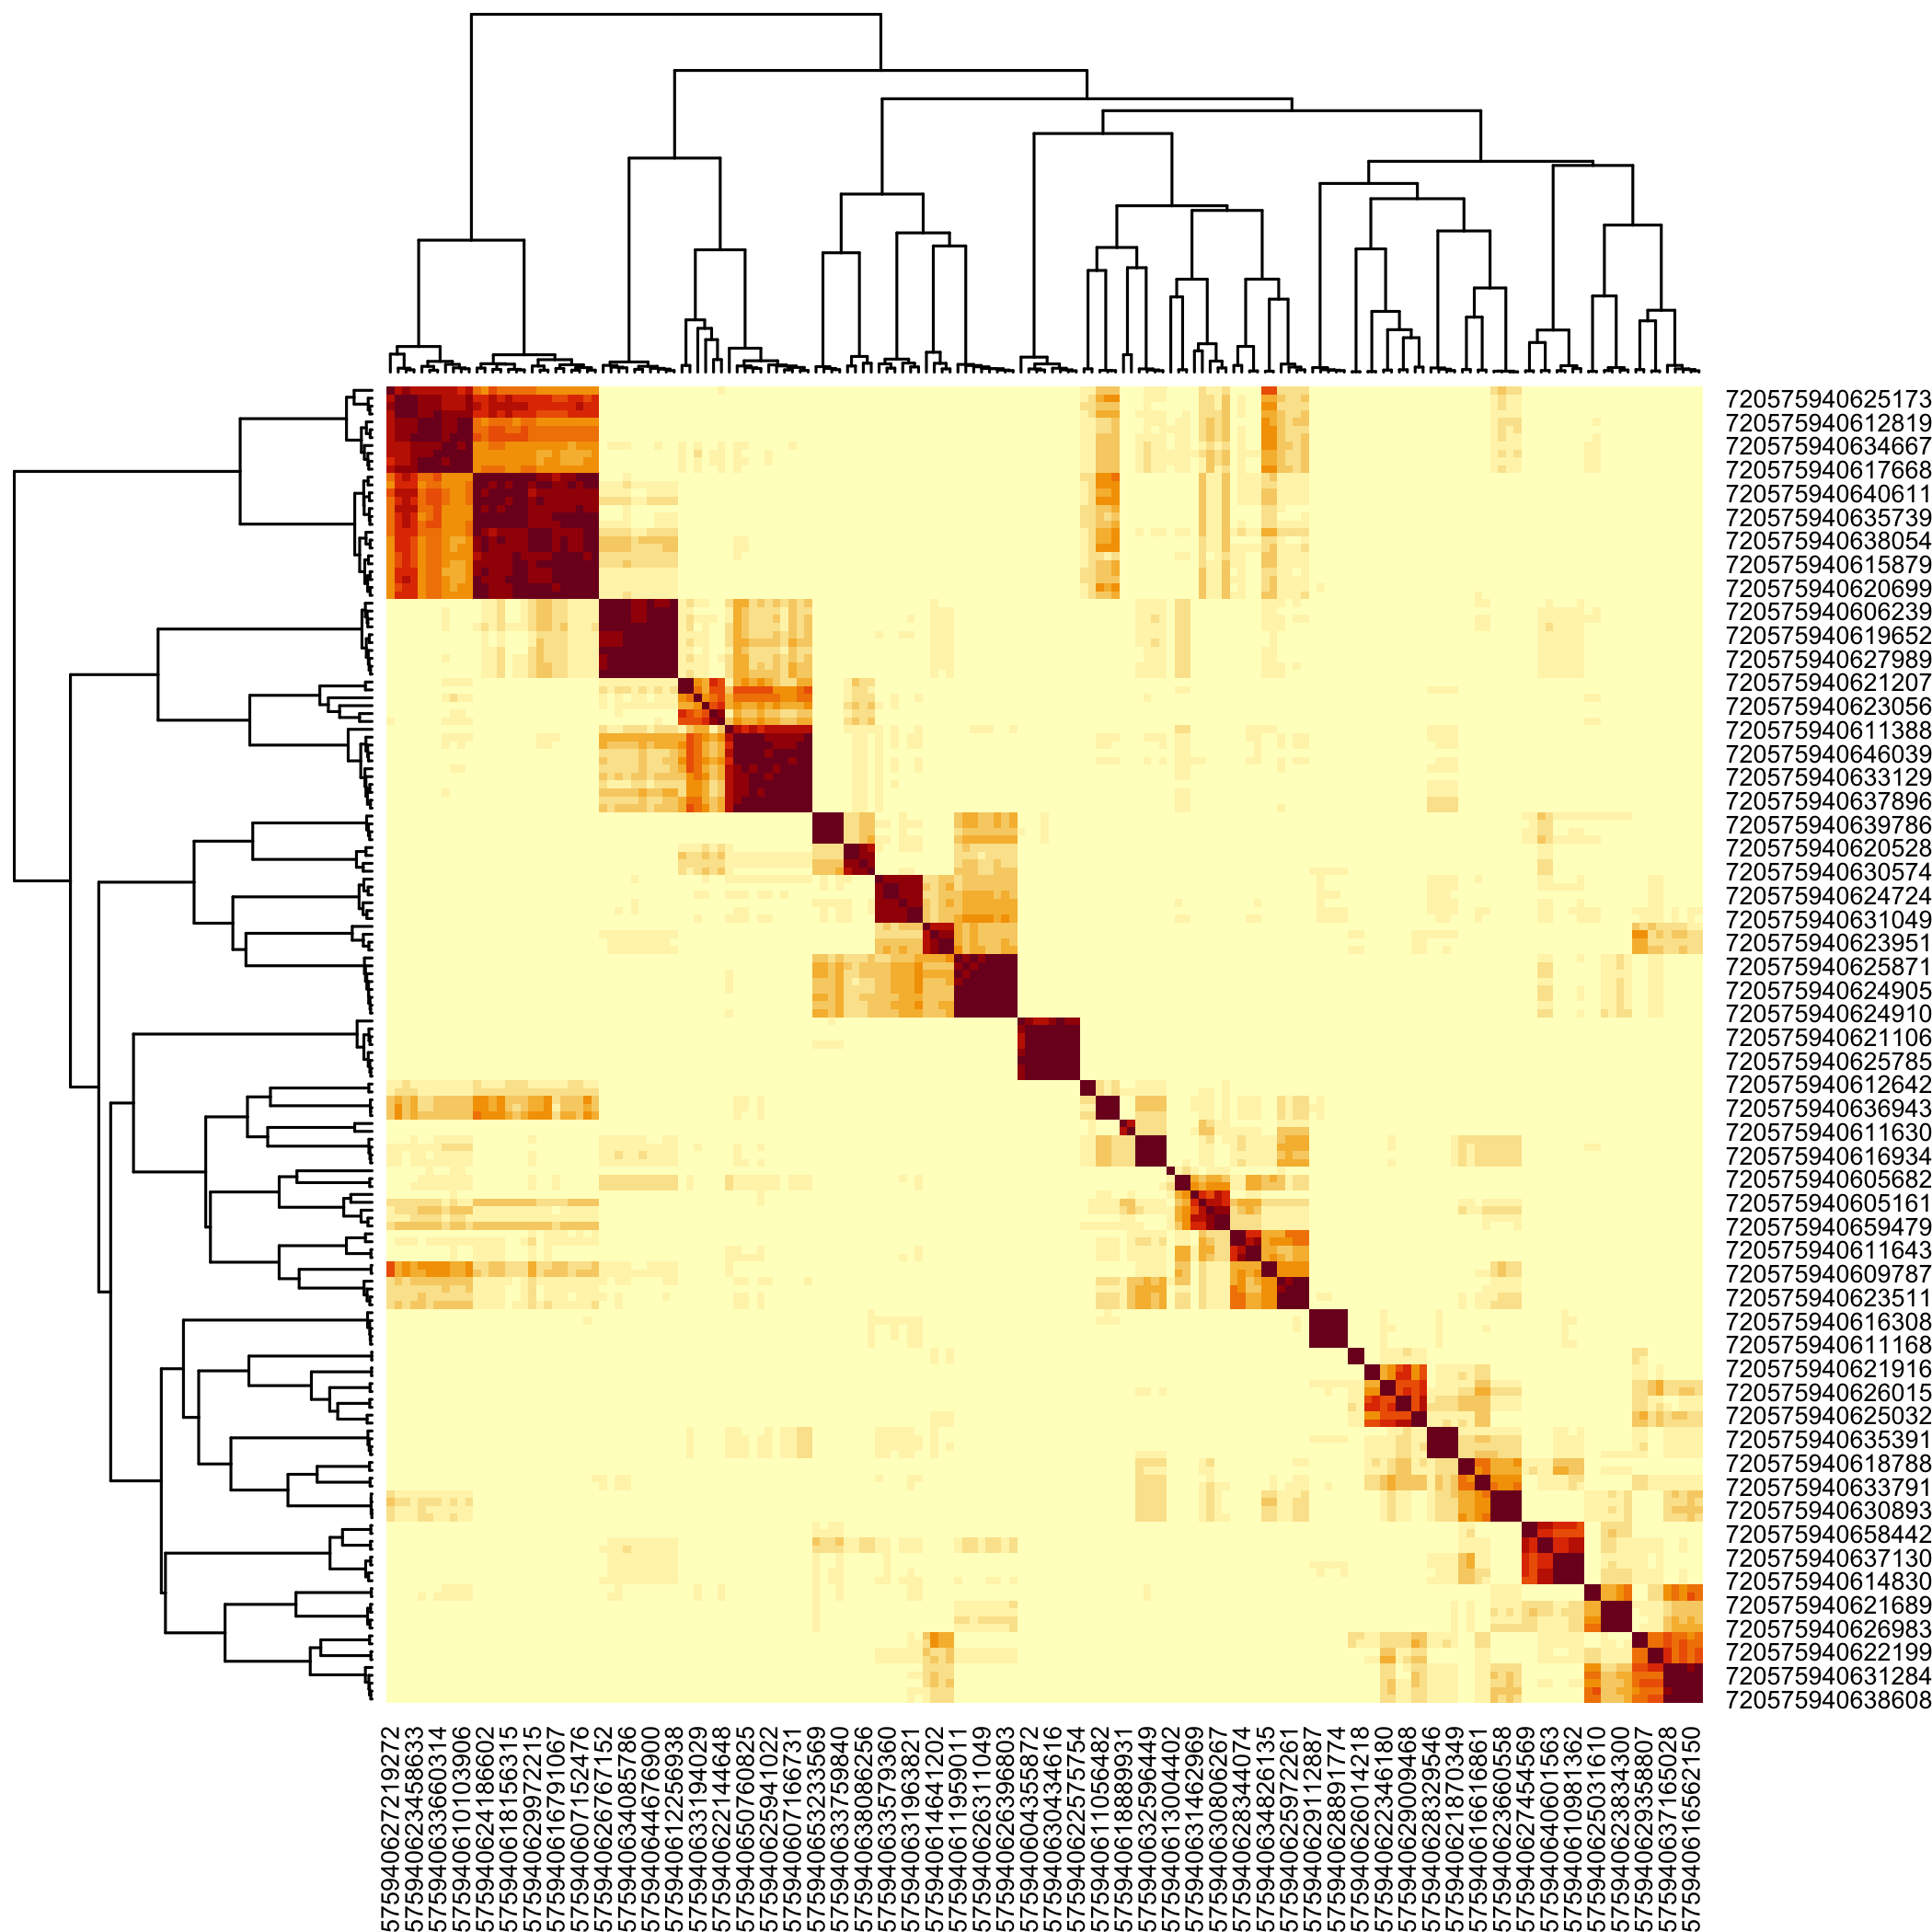

In [52]:
PanPharyngeal %>%
with(cf_cosine_plot(
        key,
        threshold = 1,
        labRow = id,  # Use raw root IDs for labels
        interactive = FALSE,
        partners = "outputs",
        method = "ward.D2",
))

# Generate the plot with corrected labels (use 'id' instead of 'side_name_id')

PanPharyngeal %>%
with(cf_cosine_plot(
        key,
        threshold = 1,
        labRow = id,  # Use raw root IDs for labels
        interactive = TRUE,
        partners = "outputs",
        method = "ward.D2"
))


In [53]:
#-----------------------------

pdf(paste0("/Users/yaolab/Library/CloudStorage/OneDrive-UniversityofFlorida/YaoLabUF/dros-gut-brain-axis/cluster_analyses/cosine_connectivity/aPhN_test/Figure_1_WD2io", v, ".pdf"),
width = 20, height = 16)
par(mar = c(10, 10, 4, 2) + 0.1)
PanPharyngeal %>%
with(cf_cosine_plot(key, threshold = 1, labRow=side_name_id, interactive = FALSE, partners = c("outputs", "inputs"), method = "ward.D2"))
dev.off()

#-----------------------------



Warning message in coconat::partner_summary2adjacency_matrix(x[["outputs"]], inputcol = "pre_key", :
“Dropping: 1084/14017 neurons representing 5684/101142 synapses due to missing ids!”
Warning message in coconat::partner_summary2adjacency_matrix(x[["inputs"]], inputcol = groupcol, :
“Dropping: 752/3857 neurons representing 2603/27398 synapses due to missing ids!”
Warning message in Matrix::cov2cor(cpx):
“diag(V) has non-positive or non-finite entries; finite result is doubtful”


pdf 
  2

In [54]:
#----------------------------
PanPharyngeal = left_join(PanPharyngeal,aPhN_PhN,by = "id")
PanPharyngeal$side_name_id = paste(
PanPharyngeal$side,
PanPharyngeal$name,PanPharyngeal$id,sep="")

In [55]:



pdf(paste0("/Users/yaolab/Library/CloudStorage/OneDrive-UniversityofFlorida/YaoLabUF/dros-gut-brain-axis/cluster_analyses/cosine_connectivity/aPhN_PhN_test/Figure_1_WDo", v, ".pdf"),
width = 20, height = 16)
par(mar = c(10, 10, 4, 2) + 0.1)
PanPharyngeal %>%
with(cf_cosine_plot(key, threshold = 1, labRow=side_name_id, interactive = FALSE, partners =  "outputs", method = "ward.D"))
dev.off()
#-----------------------------




Warning message in coconat::partner_summary2adjacency_matrix(x[["outputs"]], inputcol = "pre_key", :
“Dropping: 1084/14017 neurons representing 5684/101142 synapses due to missing ids!”


pdf 
  2

In [56]:
# Ensure that aPhN_PhN includes 'id' and 'nerve' (plus any other needed columns)
aPhN_PhN_subset <- aPhN_PhN %>% select(id, nerve, everything())

# Perform the join
PanPharyngeal <- left_join(PanPharyngeal, aPhN_PhN_subset, by = "id")


In [57]:
names(aPhN_PhN)


[1] "id"               "label"            "name"             "nt_type"         
 [5] "flow"             "super_class"      "class"            "sub_class"       
 [9] "cell_type"        "hemilineage"      "nerve"            "connectivity_tag"
[13] "side"             "input_synapses"   "output_synapses"  "in_question"

In [58]:
names(PanPharyngeal)


[1] "id"                 "supervoxel_id"      "side.x"            
 [4] "flow.x"             "class.x"            "subclass"          
 [7] "subsubclass"        "type"               "top_nt"            
[10] "lineage"            "hemibrain_type"     "fbbt_id"           
[13] "group"              "instance"           "dataset"           
[16] "key"                "label.x"            "name.x"            
[19] "nt_type.x"          "flow.y"             "super_class.x"     
[22] "class.y"            "sub_class.x"        "cell_type.x"       
[25] "hemilineage.x"      "nerve.x"            "connectivity_tag.x"
[28] "side.y"             "input_synapses.x"   "output_synapses.x" 
[31] "in_question.x"      "side_name_id"       "output_count"      
[34] "label.y"            "name.y"             "nt_type.y"         
[37] "flow.x.x"           "super_class.y"      "class.x.x"         
[40] "sub_class.y"        "cell_type.y"        "hemilineage.y"     
[43] "nerve.y"            "connectivity_tag.y" "side.x.x"          
[46] "input_synapses.y"   "output_synapses.y"  "in_question.y"     
[49] "nerve"              "label"              "name"              
[52] "nt_type"            "flow.y.y"           "super_class"       
[55] "class.y.y"          "sub_class"          "cell_type"         
[58] "hemilineage"        "connectivity_tag"   "side.y.y"          
[61] "input_synapses"     "output_synapses"    "in_question"

In [59]:
PanPharyngeal <- PanPharyngeal %>%
mutate(nerve_label = paste(nerve.y, id, sep=": "))


In [60]:
# Adjust plot parameters so labels have room to display
par(cex.axis = 0.5)
options(repr.plot.res = 1200)

In [61]:
# Set graphic parameters to bring labels closer and add ticks
par(mgp = c(3, .7, 0), tcl = -0.3)

# Set margins if needed (you already have a large left margin)
par(mar = c(6, 8, 4, 2) + 0.1, oma = c(0, 0, 0, 0))

# Generate the heat map using the custom labels with increased text size if needed
PanPharyngeal %>%
with(cf_cosine_plot(
        key,
        threshold = 1,
        labRow = nerve_label,      # Custom labels with nerve: id
        interactive = FALSE,
        partners = "outputs",
        method = "ward.D2",
        cexRow = 0.1,              # Increase row label font size for clarity
        cexCol = 0.1               # Increase column label font size if needed
))

# If the function doesn't draw ticks, add them manually:
N <- nrow(PanPharyngeal)
axis(side = 2, at = 1:N, labels = rep("", N), tick = TRUE, las = 1)

Warning message in coconat::partner_summary2adjacency_matrix(x[["outputs"]], inputcol = "pre_key", :
“Dropping: 1084/14017 neurons representing 5684/101142 synapses due to missing ids!”


In [62]:
options(repr.plot.res = 1200)

In [63]:
# Create a color mapping for nerve groups
library(RColorBrewer)
unique_nerve <- unique(PanPharyngeal$`nerve.y`)
nerve_colors <- setNames(brewer.pal(length(unique_nerve), "Set3"), unique_nerve)
row_colors <- nerve_colors[PanPharyngeal$`nerve.y`]

PanPharyngeal %>%
with(cf_cosine_plot(
        key,
        threshold = 1,
        labRow = nerve_label,      # Custom labels with nerve: id
        interactive = FALSE,
        partners = "outputs",
        method = "ward.D2",
        cexRow = 0.1,
        cexCol = 0.1,
        RowSideColors = row_colors  # Pass your color vector (if supported)
))


Warning message in coconat::partner_summary2adjacency_matrix(x[["outputs"]], inputcol = "pre_key", :
“Dropping: 1084/14017 neurons representing 5684/101142 synapses due to missing ids!”


In [65]:
# Adjust plot parameters so labels have room to display
par(cex.axis = 0.5)
options(repr.plot.res = 300)

In [66]:
# Generate the plot with corrected labels (use 'id' instead of 'side_name_id')
pdf(paste0("/Users/yaolab/Library/CloudStorage/OneDrive-UniversityofFlorida/YaoLabUF/dros-gut-brain-axis/cluster_analyses/cosine_connectivity/aPhN_PhN_test/Figure_1_WD2o", v, ".pdf"),
    width = 20, height = 16)

# Set graphic parameters to bring labels closer and add ticks
par(mgp = c(3, .7, 0), tcl = -0.3)

# Set margins if needed (you already have a large left margin)
par(mar = c(15, 20, 4, 2) + 0.1, oma = c(0, 0, 0, 0))

# Generate the heat map using the custom labels with increased text size if needed
PanPharyngeal %>%
with(cf_cosine_plot(
        key,
        threshold = 1,
        labRow = nerve_label,      # Custom labels with nerve: id
        interactive = FALSE,
        partners = "outputs",
        method = "ward.D2",
        cexRow = 0.4,              # Increase row label font size for clarity
        cexCol = 0.4               # Increase column label font size if needed
))

# If the function doesn't draw ticks, add them manually:
N <- nrow(PanPharyngeal)
axis(side = 2, at = 1:N, labels = rep("", N), tick = TRUE, las = 1)
dev.off()

Warning message in coconat::partner_summary2adjacency_matrix(x[["outputs"]], inputcol = "pre_key", :
“Dropping: 1084/14017 neurons representing 5684/101142 synapses due to missing ids!”


pdf 
  2

In [69]:
library(tidyverse)
library(coconatfly)
library(glue)

# Rename first column to 'id'
colnames(aPhN_PhN)[1] <- 'id'

# Retrieve metadata for all pharyngeal cells using the connectivity matrix (PanPharyngeal$key)
hc <- cf_cosine_plot(
    PanPharyngeal$key,
threshold = 1,
partners = "outputs",
method = "ward.D2",
heatmap = FALSE  # do not plot; return hclust
)

PanPharyngeal_meta <- cf_meta(hc)
PanPharyngeal_meta <- coconat::add_cluster_info(PanPharyngeal_meta, hc, h = 0.75, idcol = 'key')



Warning message in coconat::partner_summary2adjacency_matrix(x[["outputs"]], inputcol = "pre_key", :
“Dropping: 1084/14017 neurons representing 5684/101142 synapses due to missing ids!”


In [70]:
# Create combined labels: "id: nerve"
combined_labels <- paste(PanPharyngeal_meta$id, PanPharyngeal_meta$nerve, sep="_")

# Save to PDF with adjusted margins to prevent clipping of labels
pdf(paste0(PATH_output, "aPhN_PhN_dendrogram_wardd2.pdf"), width = 10, height = 6)
par(mar = c(15, 5, 4, 5), xpd = TRUE)
plot(hc,
     labels = combined_labels,
     hang = -0.01,
     cex = 0.3,
     main = "PanPharyngeal Sensory Axons Dendrogram")
dev.off()

pdf 
  2

null device 
          1

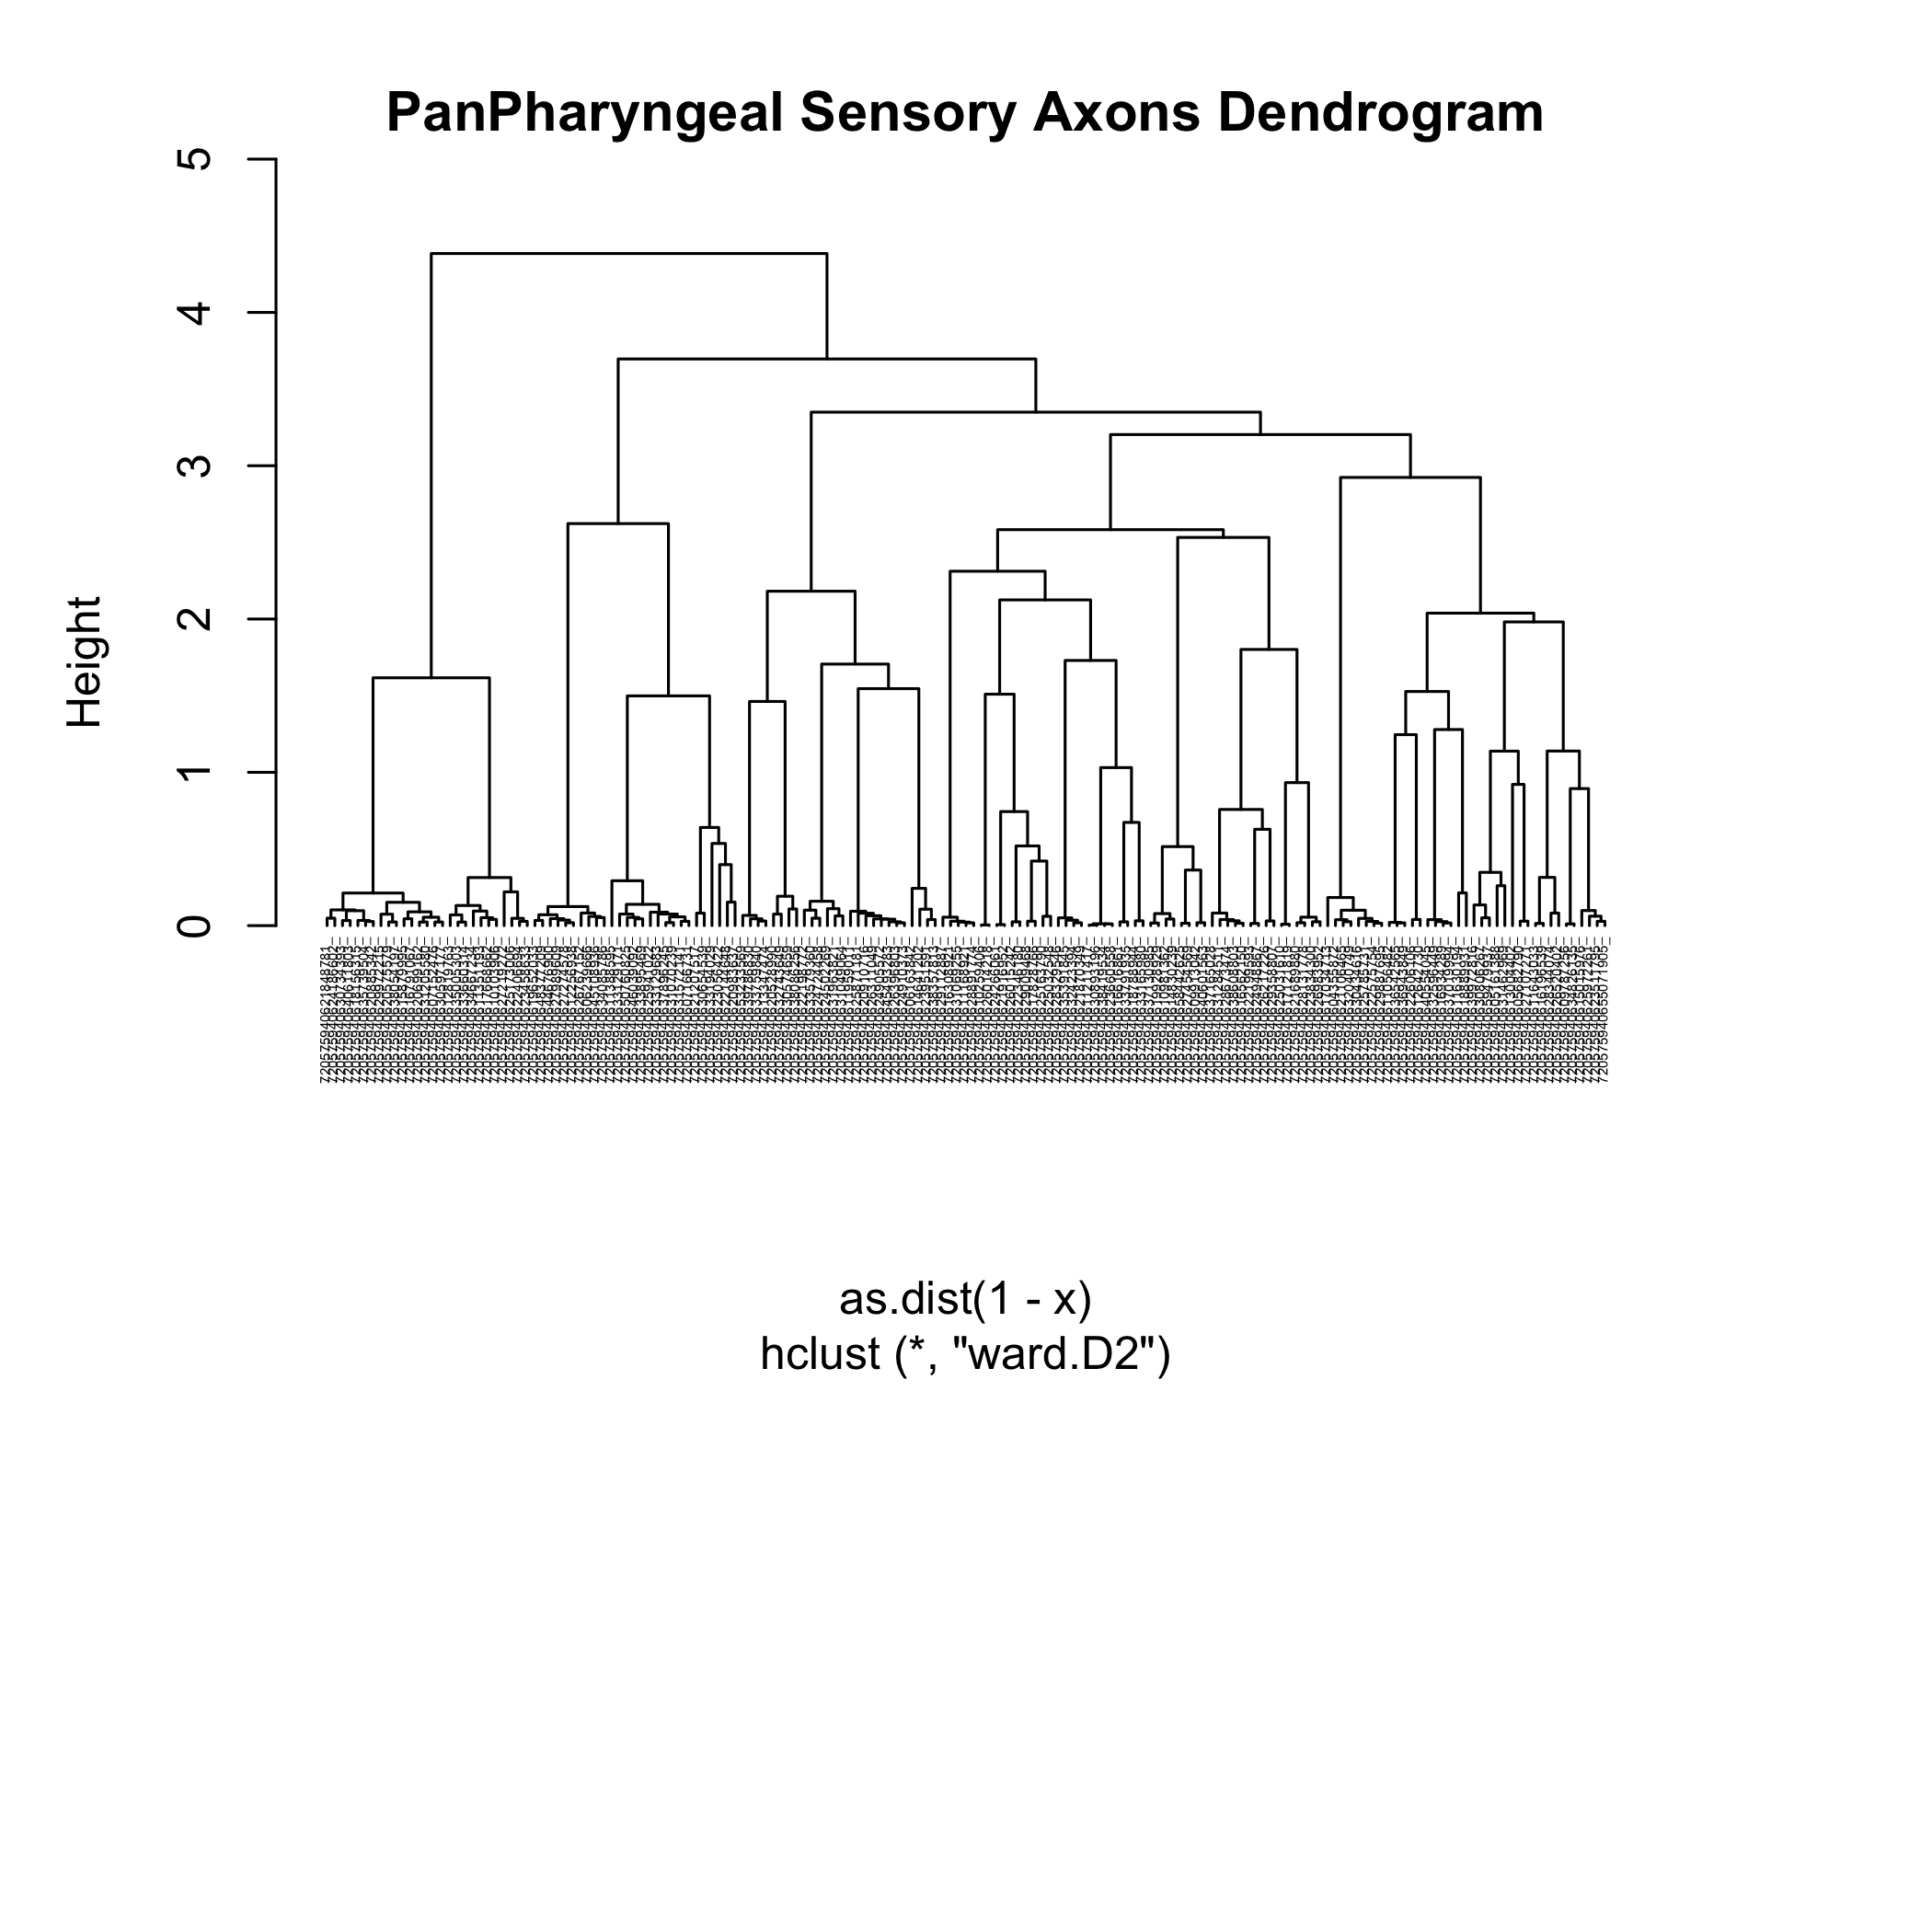

In [71]:
# Create combined labels: "id: nerve"
combined_labels <- paste(PanPharyngeal_meta$id, PanPharyngeal_meta$nerve, sep="_")


par(mar = c(15, 5, 4, 5), xpd = TRUE)
plot(hc,
     labels = combined_labels,
     hang = -0.01,
     cex = 0.3,
     main = "PanPharyngeal Sensory Axons Dendrogram")
dev.off()

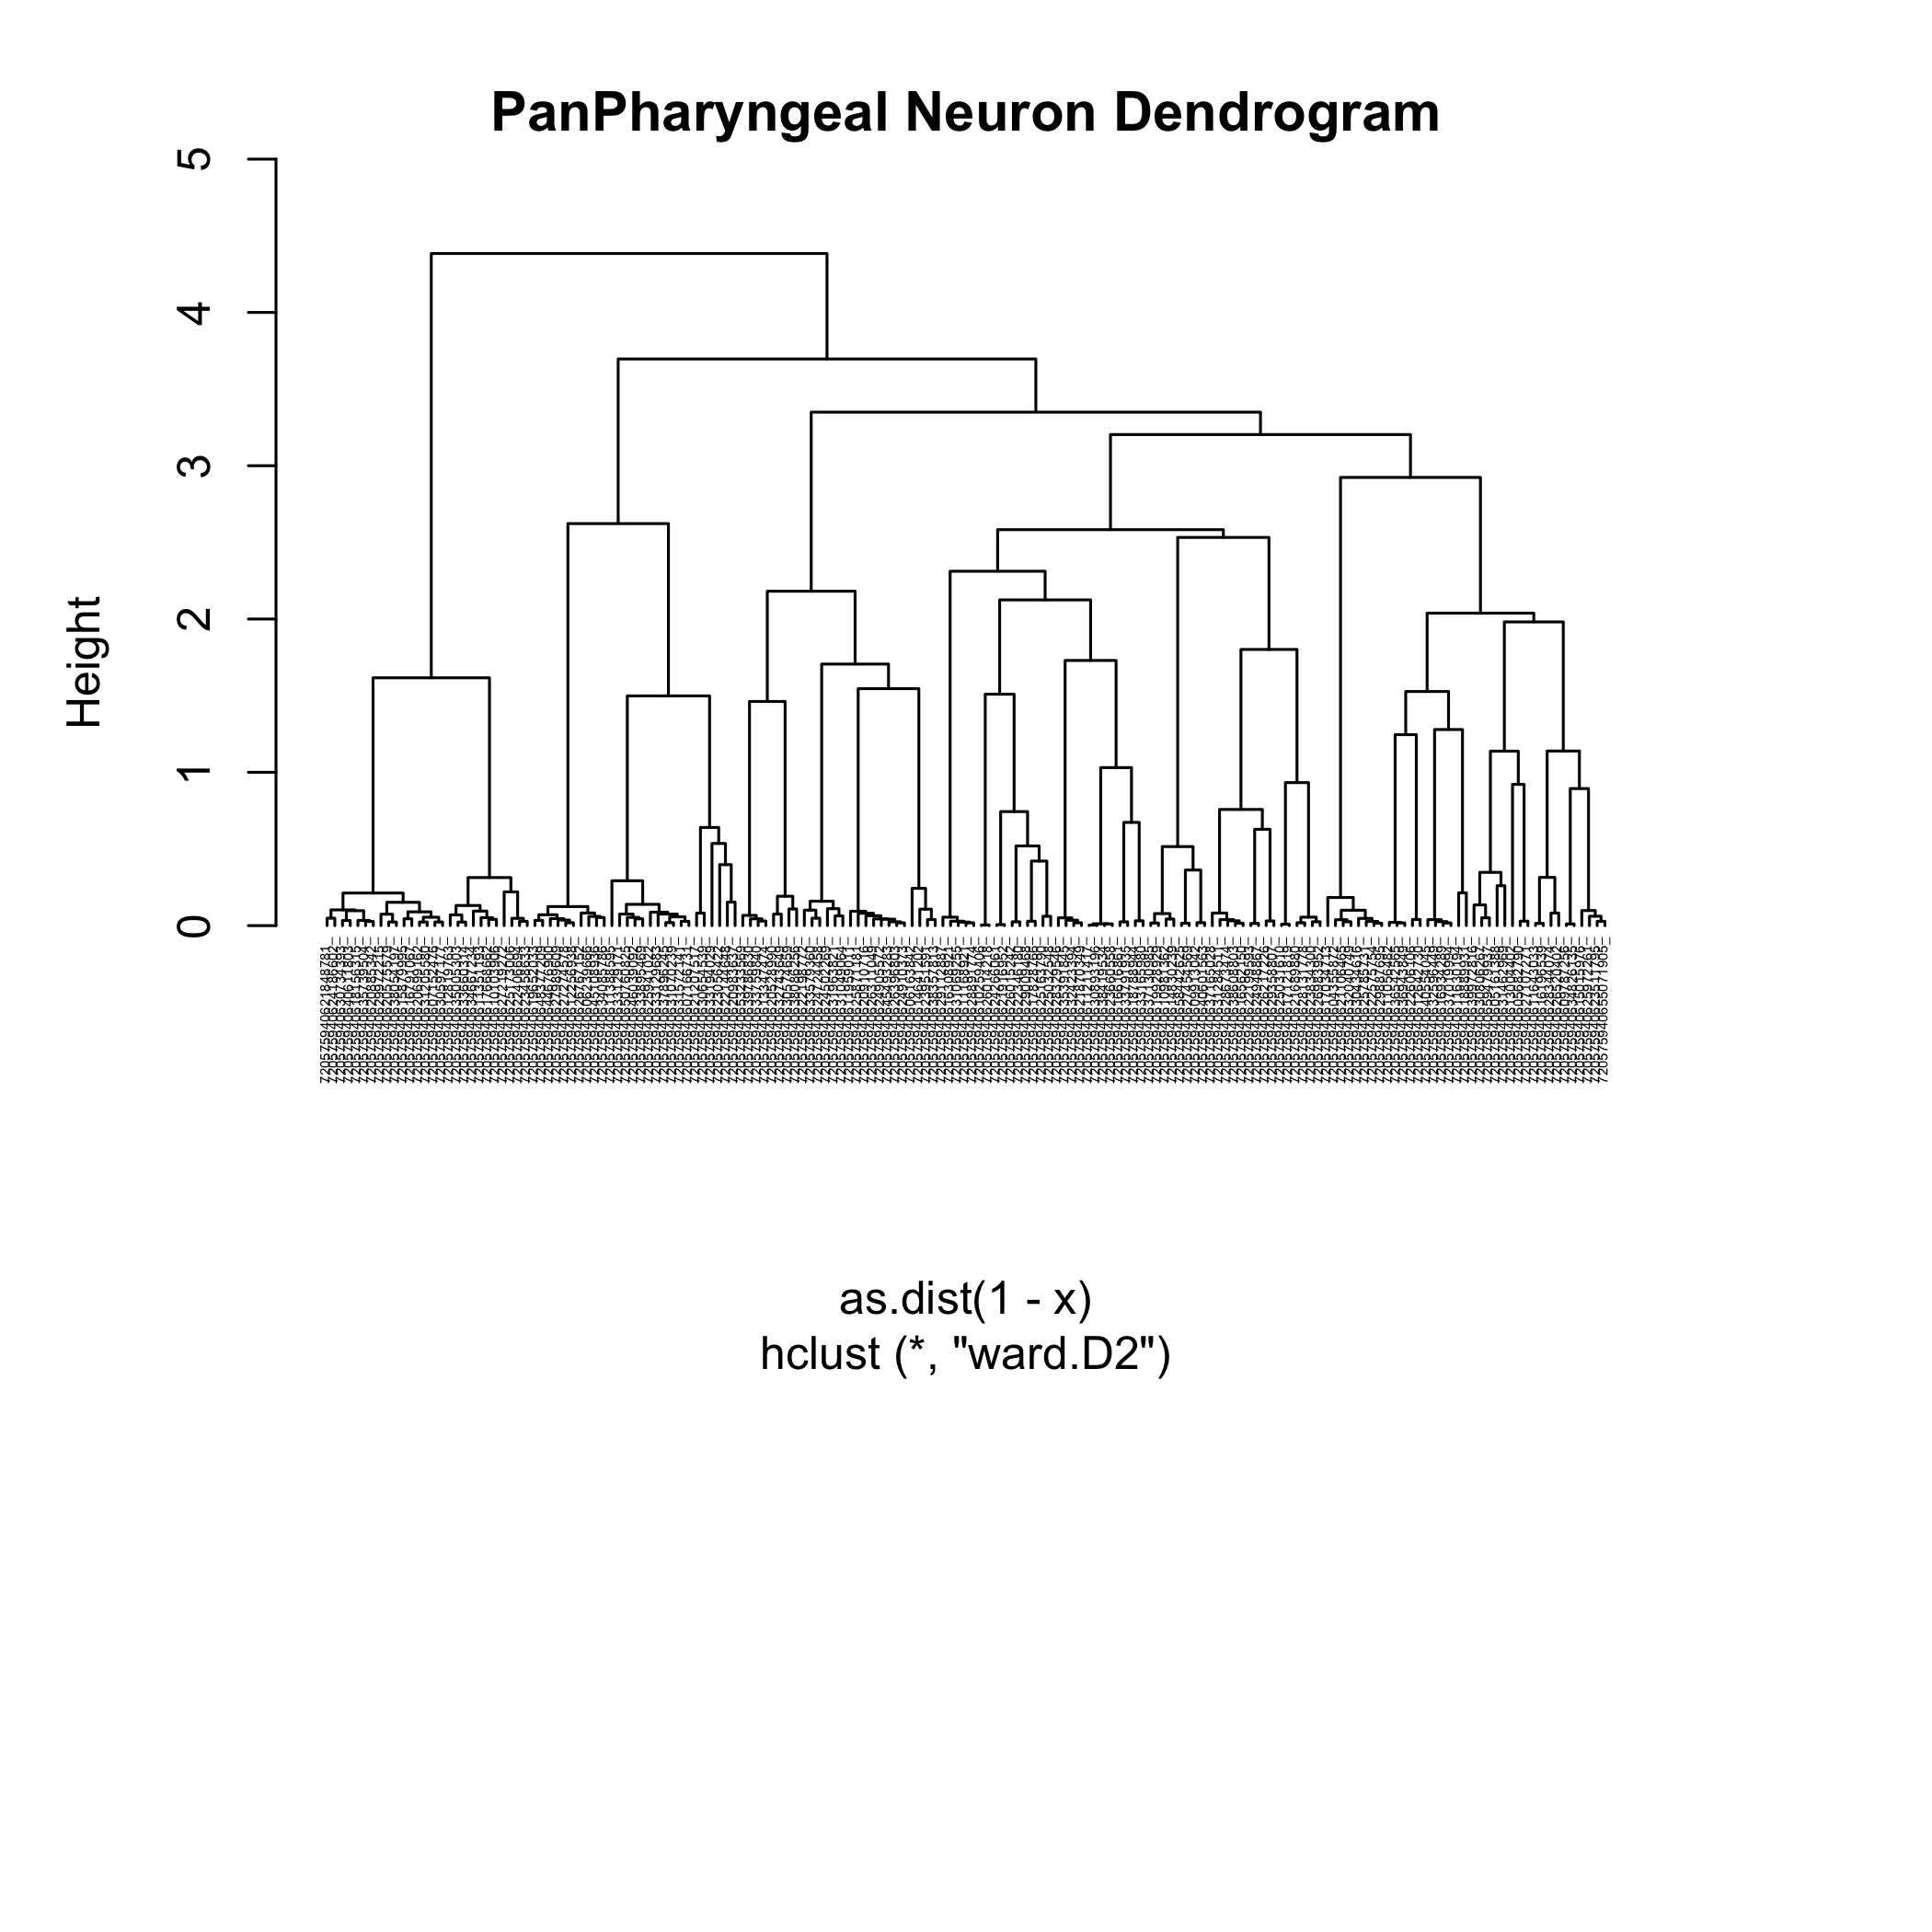

In [72]:
# Plot inline in your notebook at 300 dpi with similar margin settings
options(repr.plot.res = 300)
par(mar = c(15, 5, 4, 5), xpd = TRUE)
plot(
    hc,
    labels = combined_labels,
    hang = -0.01,
    cex = 0.3,
    main = "PanPharyngeal Neuron Dendrogram"
)

In [73]:
PanPharyngeal_meta <- left_join(PanPharyngeal_meta, aPhN_PhN %>% select(id, nerve), by = "id")


In [74]:
combined_labels <- paste(PanPharyngeal_meta$id, PanPharyngeal_meta$nerve, sep=": ")


pdf 
  2

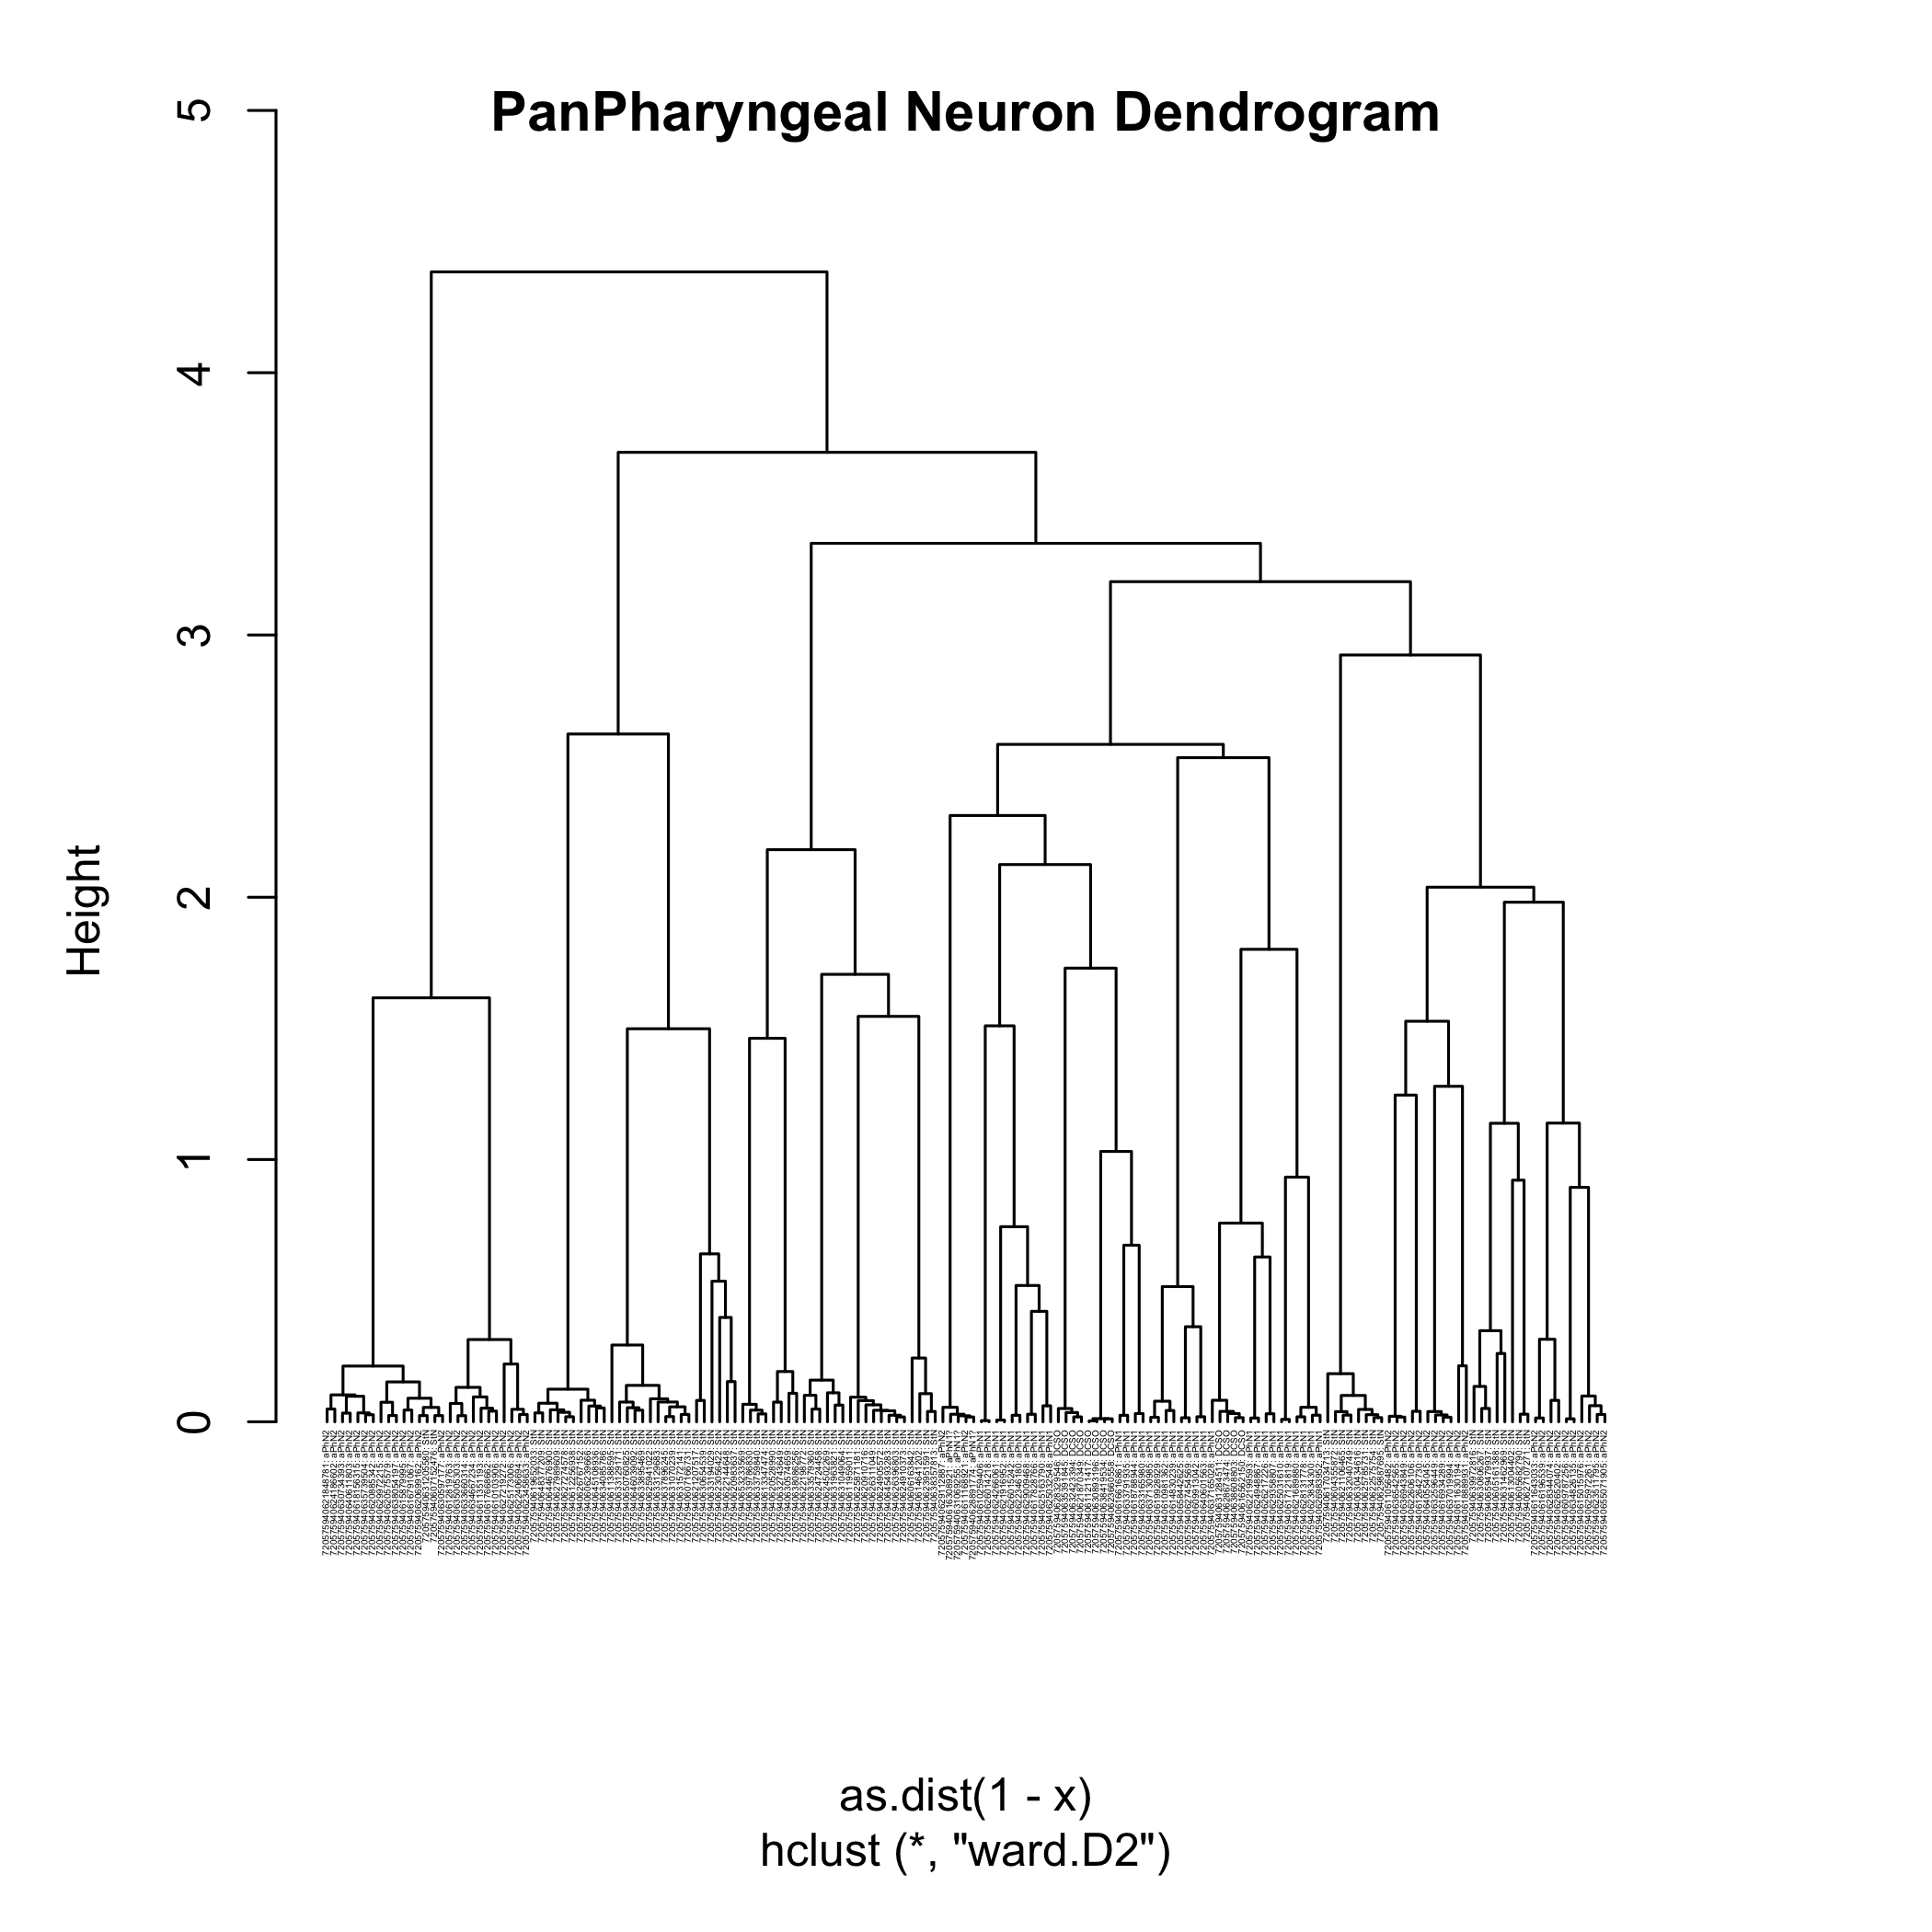

In [75]:
pdf(paste0(PATH_output, "aPhN_PhN_dendrogram_wardd2.pdf"), width = 10, height = 6)
par(mar = c(6, 5, 4, 5), xpd = TRUE)
plot(hc,
     labels = combined_labels,
     hang = -0.01,
     cex = 0.2,
     main = "PanPharyngeal Sensory Axons Dendrogram")
dev.off()

options(repr.plot.res = 300)
par(mar = c(6, 5, 4, 5), xpd = TRUE)
plot(
    hc,
    labels = combined_labels,
    hang = -0.01,
    cex = 0.2,
    main = "PanPharyngeal Neuron Dendrogram"
)


pdf 
  2

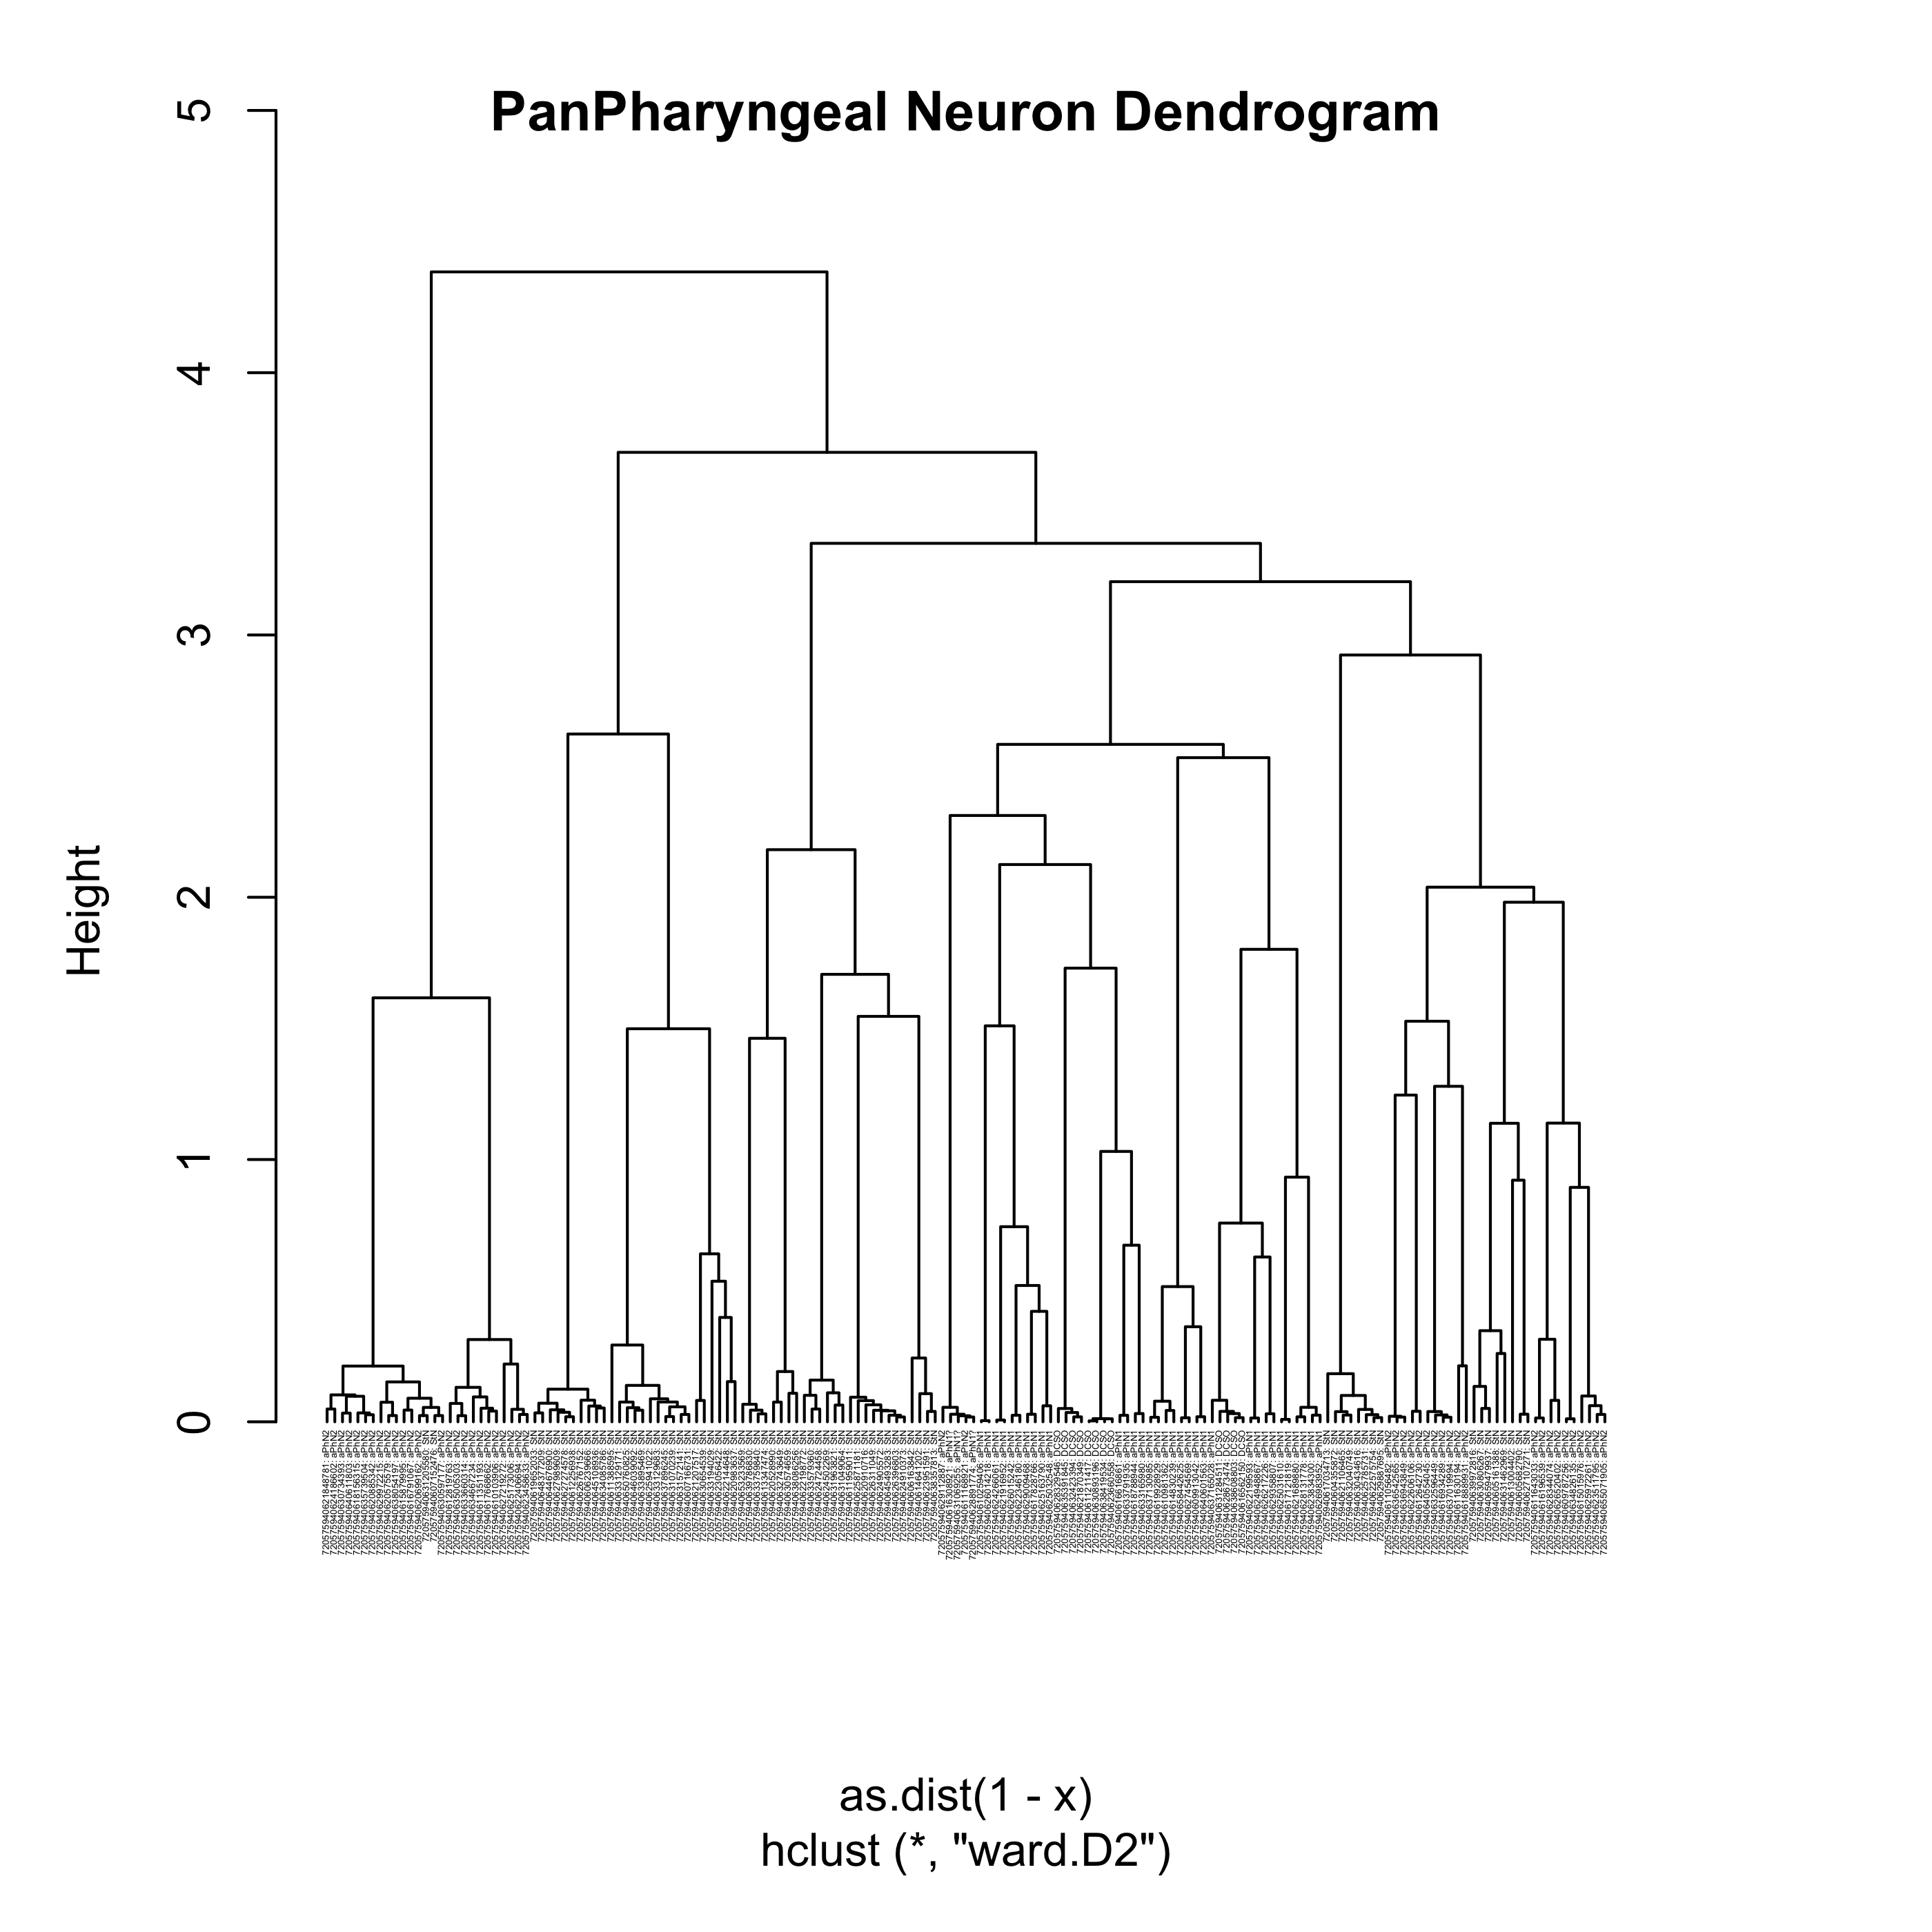

In [81]:
svg(paste0(PATH_output, "aPhN_PhN_dendrogram_wardd2.svg"), width = 10, height = 4)
par(mar = c(6, 5, 4, 5), xpd = TRUE)
plot(hc,
     labels = combined_labels,
     hang = -0.01,
     cex = 0.2,
     main = "PanPharyngeal Sensory Axons Dendrogram")
dev.off()

options(repr.plot.res = 400)
par(mar = c(6, 5, 4, 5), xpd = TRUE)
plot(
    hc,
    labels = combined_labels,
    hang = -0.01,
    cex = 0.2,
    main = "PanPharyngeal Neuron Dendrogram"
)


In [77]:
pdf(paste0(PATH_output, "aPhN_PhN_dendrogram_ward.pdf"), width = 10, height = 6)
plot(hc,
     labels = PanPharyngeal_meta$id,
     hang = -0.01,
     cex = 0.7,
     main = "PanPharyngeal Neuron Dendrogram")
dev.off()

pdf 
  2

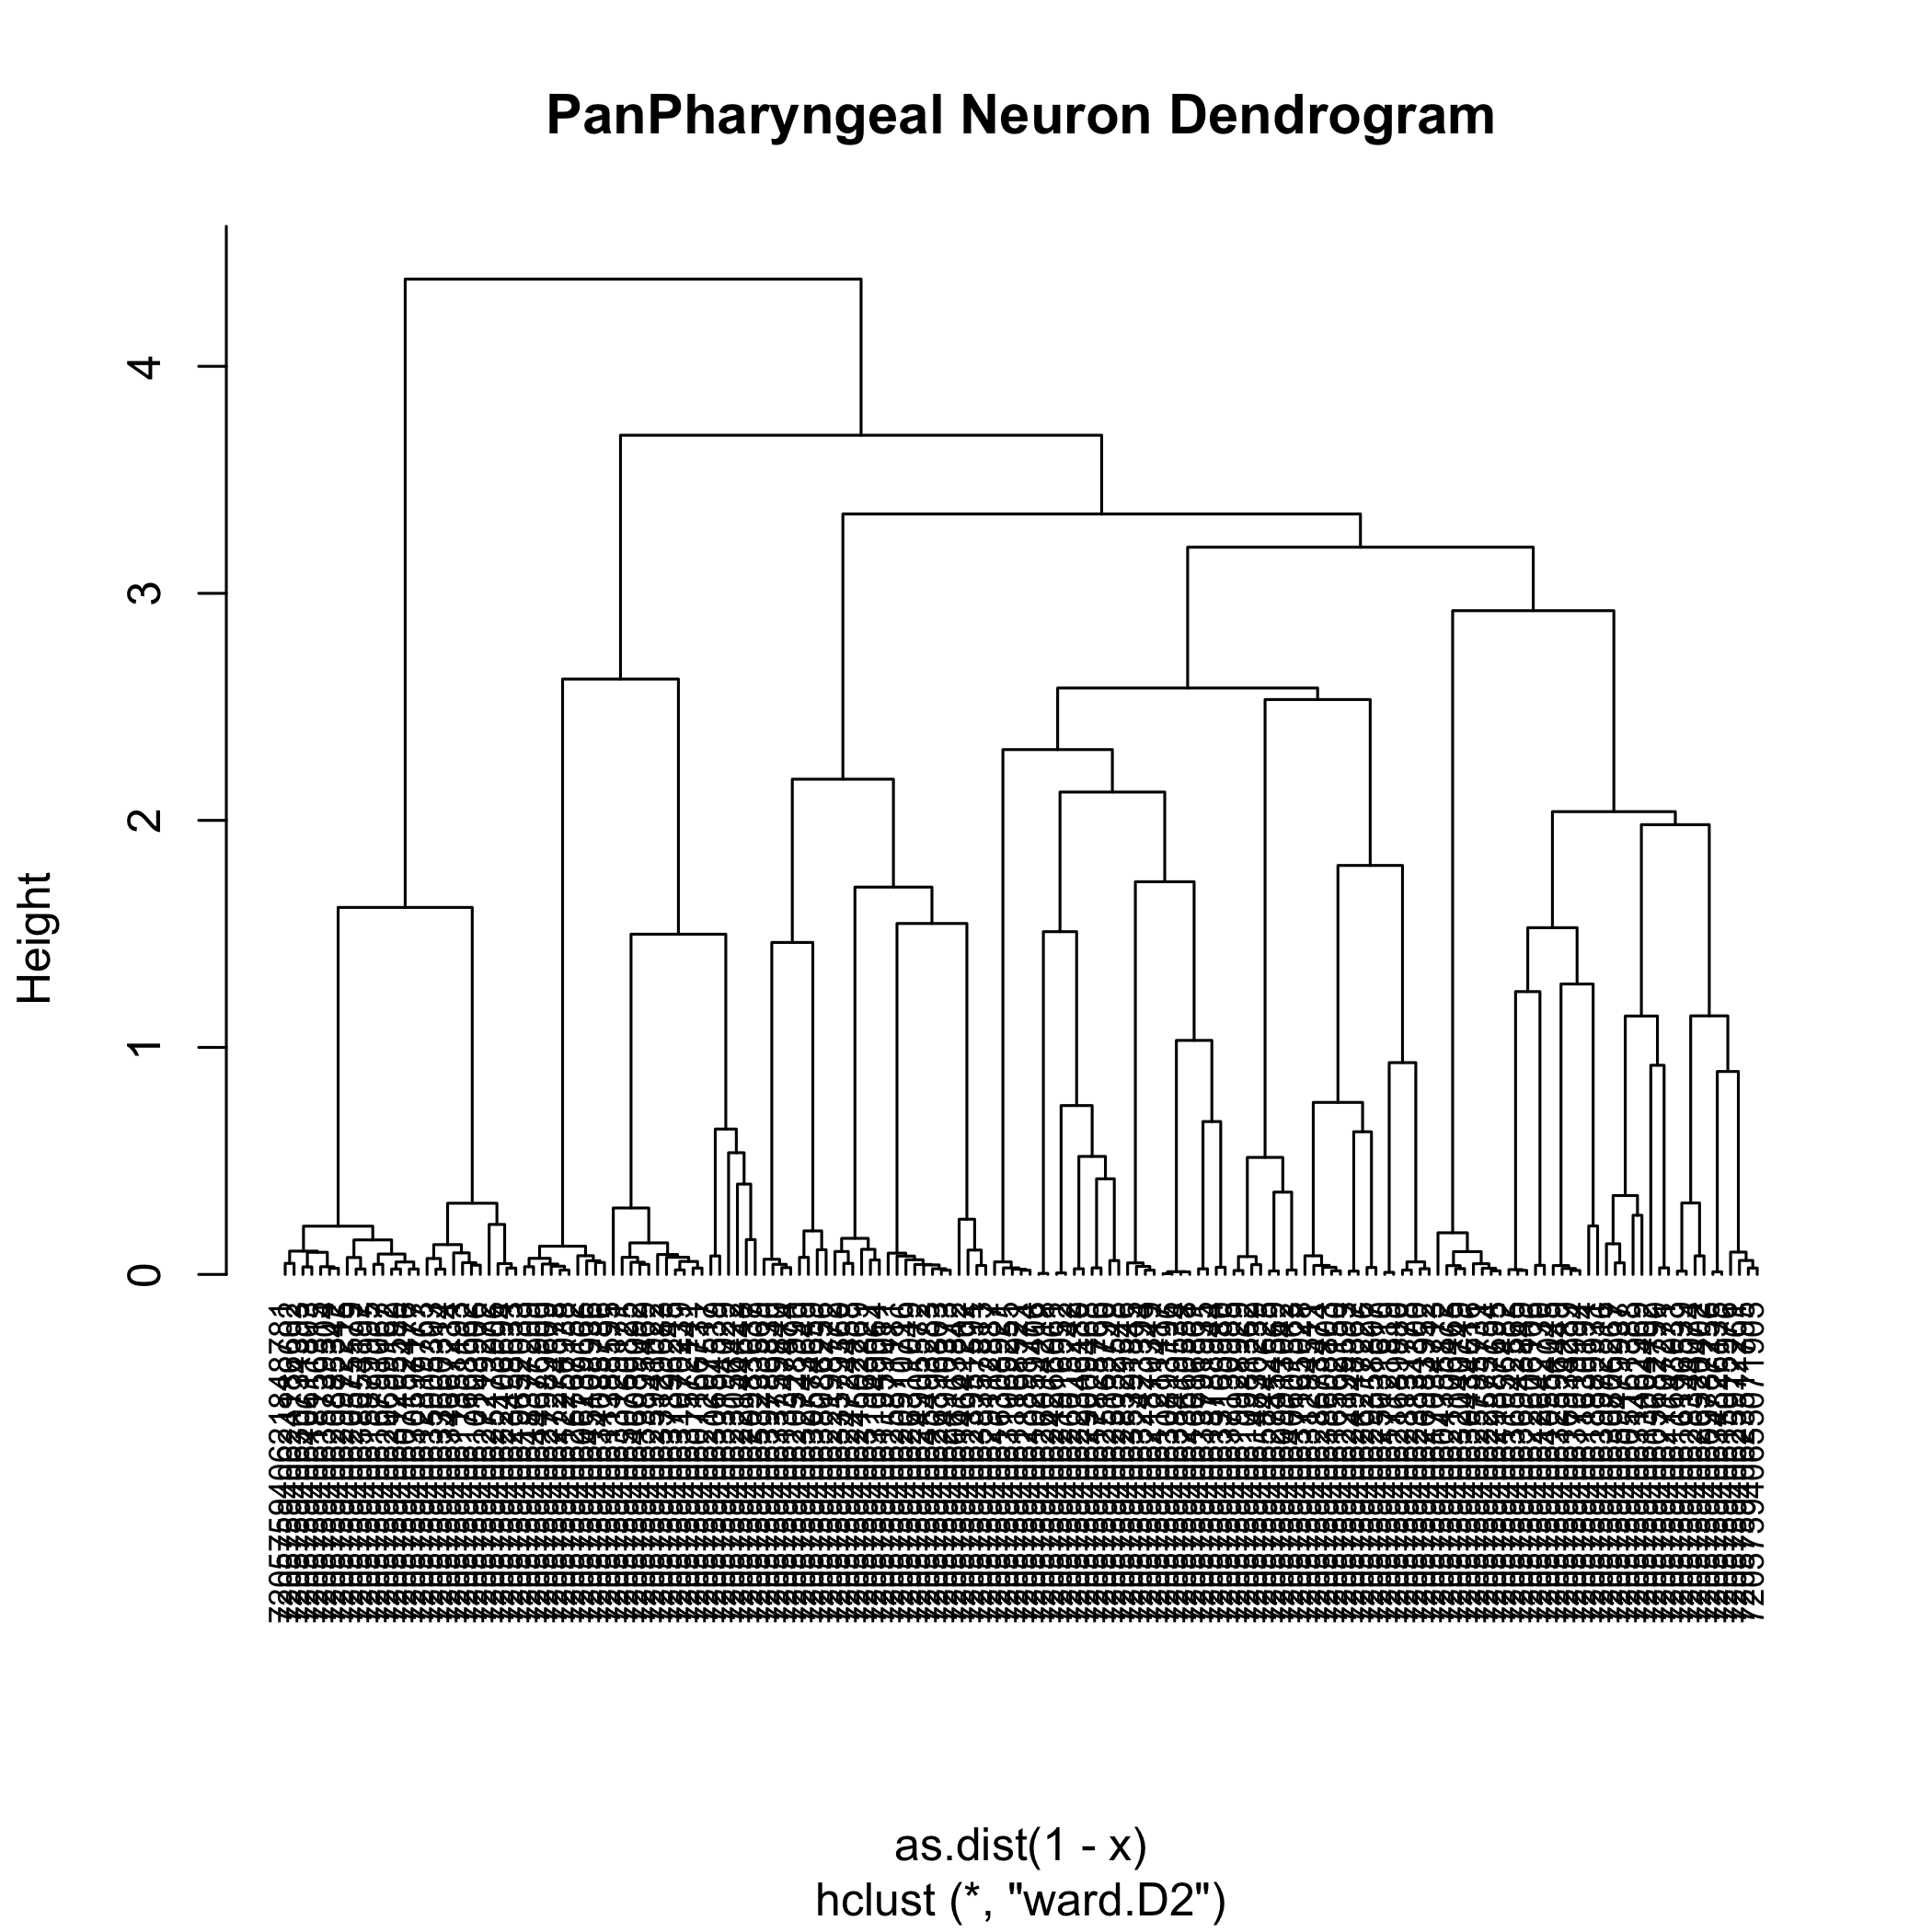

In [78]:
plot(
    hc,
    labels = PanPharyngeal_meta$id,  # <-- Use root IDs here
hang = -0.01,
cex = 0.7,
main = "PanPharyngeal Neuron Dendrogram"
)


In [79]:
# 1. Define your color mapping for the nerves
# (Adjust the nerve names and colors as needed)
nerve_colors <- c(
    "aPhN" = "red",
"PhN" = "blue",
)

# 2. Create a vector of colors corresponding to each root id based on its nerve
# Make sure that the 'nerve' column in your PanPharyngeal data frame contains the matching nerve names.
row_label_colors <- nerve_colors[PanPharyngeal$nerve]

# 3. Pass the color vector to the plotting function if it supports a label color argument.
# Here we assume that cf_cosine_plot has an argument 'labRowCol' to set the label colors.
PanPharyngeal %>%
with(cf_cosine_plot(
        key,
        threshold = 1,
        labRow = id,         # use the root IDs as labels
        labRowCol = row_label_colors,  # color-code labels by nerve
        interactive = FALSE,
        partners = "outputs",
        method = "ward.D2"
))


ERROR: Error in c(aPhN = "red", PhN = "blue", ): argument 3 is empty


In [40]:
names(PanPharyngeal)
names(aPhN_PhN)

[1] "id"                 "supervoxel_id"      "side.x"            
 [4] "flow.x"             "class.x"            "subclass"          
 [7] "subsubclass"        "type"               "top_nt"            
[10] "lineage"            "hemibrain_type"     "fbbt_id"           
[13] "group"              "instance"           "dataset"           
[16] "key"                "label.x"            "name.x"            
[19] "nt_type.x"          "flow.y"             "super_class.x"     
[22] "class.y"            "sub_class.x"        "cell_type.x"       
[25] "hemilineage.x"      "nerve.x"            "connectivity_tag.x"
[28] "side.y"             "input_synapses.x"   "output_synapses.x" 
[31] "in_question.x"      "side_name_id"       "output_count"      
[34] "label.y"            "name.y"             "nt_type.y"         
[37] "flow.x.x"           "super_class.y"      "class.x.x"         
[40] "sub_class.y"        "cell_type.y"        "hemilineage.y"     
[43] "nerve.y"            "connectivity_tag.y" "side.x.x"          
[46] "input_synapses.y"   "output_synapses.y"  "in_question.y"     
[49] "nerve"              "label"              "name"              
[52] "nt_type"            "flow.y.y"           "super_class"       
[55] "class.y.y"          "sub_class"          "cell_type"         
[58] "hemilineage"        "connectivity_tag"   "side.y.y"          
[61] "input_synapses"     "output_synapses"    "in_question"       
[64] "nerve_label"

[1] "id"               "label"            "name"             "nt_type"         
 [5] "flow"             "super_class"      "class"            "sub_class"       
 [9] "cell_type"        "hemilineage"      "nerve"            "connectivity_tag"
[13] "side"             "input_synapses"   "output_synapses"  "in_question"